## Ноутбук с исследованиями и подготовкой предоставленных данных

Предварительная подготовка данных для работы проекта.

Полный код обработки и подготовки данных, обучение модели и вывод предсказаний находятся в модулях PyCarm

## Описание проекта - Анализ сайта «СберАвтоподписка»

Цель проекта:

1. Научиться предсказывать совершение целевого действия
(ориентировочное значение ROC-AUC ~ 0.65) — факт совершения
пользователем целевого действия.

2. Упаковать получившуюся модель в сервис, который будет брать на
вход все атрибуты, типа utm_*, device_*, geo_*, и отдавать на выход
0/1 (1 — если пользователь совершит любое целевое действие).


Приложения к заданию:
1. датасет GA Sessions
2. датасет GA Hits

Работа проводилась в Python, использовались: jupyter_notebook и PyCharm

#### План работы:



1. Исследование датасета GA Sessions
на предмет: типов данных, пропущенных значений, взаимосвязей между переменными

2. Исследование датасета GA Hits
на предмет: типов данных, пропущенных значений, взаимосвязей между переменными

Пункты: 3. 4. 5. обрабатывались в PyCharm код написан для ознакомления

3. Извлечение целевой переменной - event_value из GA Hits

4. Объединение датасета GA Session и целевой переменной

5. Удаление дубликатов

6. Удаление неинформативных признаков, с пропусками в значениях более 45%

7. Заполнение пропусков в категориальных переменных введением дополнительного значения, ввиду предположения, что пропуски в данных колонках обусловлены отсутствием события

8. Изменение значений в скобках (not_set) и (none) в признаке utm_medium

9. Удаление выбросов в числовых переменных, заменой значений выбросов, значением следующим за граничным значением квантиля, в данном случае==2


10. Визуализация данных. Создание дополнительного датафрейма с преобразованием данных по типу '.astype('category').cat.codes', для предварительного просмотра корреляций признаков к целевой переменной

11. Преобразование значений в категориальных признаках. Взяты первые 2-5 букв значения в признаках: utm_source, utm_campaign, utm_adcontent, с сохранением количества уникальных значений

12. Объединение колонок содержащих дату и время и приведение к типу Datetime

13. Преобразование Datetime - взят: месяц, день недели, час, события

14. Приведение значений признака device_screen_resolution к типу float

15. Приведение geo_city, geo_country к координатам, ОТ ИДЕИ ОТКАЗАЛСЯ

16. Изменение признаков geo_city, geo_country. Сокращено количество значений и приведено к типу int. Создан новый признак geo, значения в котором: 0 - все страны кроме России, 1 - города России, 2 - Санкт-Петербург, 3 - Москва.

17. Создание дополнительного признака utm_path из признаков: w_source, w_campaign, w_adcontent

18. Создание дополнительного признака utm_organic класифицирующего тип трафика (платный или бесплатный)

19. Удаление колонок 'session_id', 'client_id' (возможно колоку 'session_id' оставим, посмотрим на поведение модели)

20. Создание дополнительного признака count для сохранения количества повторений данных при удалении дубликатов
в последствии отказался

21. Удаление дубликатов

22. Преобразование данных, в отдельном датафрейме, для просмотра корреляций признаков к целевой переменной

23. Просмотр корреляций и удаление слабокоррелируемых признаков. С корреляцией -0.01 - 0.01. От реализации ОТКАЗАЛСЯ

24. Проведение экспериментов по балансировке классов. Использован метод Undersampling. Впоследствии от реализации отказался

! 25. Дальнейшая работа над проектом производилась в PyCharm !

25. Преобразование числовых переменных в StandardScaler

26. Преобразование категориальных переменных в OneHotEncoder

27. Подготовка модуля в PyCharm - take_data для автоматического: получения целевой переменной, объединения датасетов и удаления дубликатов

28. Подготовка pipeline в PyCharm

29. Обучение модели

30. Подготовка модуля для обращения к модели в Fastapi

31. Подготовка модуля для AirFlow



#### Особенности проекта

Особенности проекта:

1. На этапе исследования данных стало очевидно следующее:

данные слабокоррелированы к целевой переменной

в данных дисбаланс классов

2. На этапе Feature engineering были созданы следующие фичи:

date_time - дата и время события

month_day_your - месяц, день недели и час события

geo - численная переменная указывающая на локацию (от перевода к координатам отказался ввиду значительного времени обработки)

utm_organic - переменная указывающая на тип трафика

utm_path - составная переменная состоящая из нескольких признаков типа utm

3. Проводились эксперименты по балансировке классов методами Взвешивания классов и Undersampling. Впоследствии от идеи балансировки классов отказался. Поскольку результаты обучения моделей на подготовленных данных были стабильны и TruePositiveRate была достаточного уровня. Что позволило сохранить естественные данные и не допустить их искутвенности.

4. По итогам этапа Evaluation, для обучения модели были оставлены следующие признаки:

visit_date

visit_number

utm_path

utm_organic

device_screen_resolution

geo

count_duplicates

event_value - целевая переменная

5. Вывод TruePositiveRate и ConfusionMatrix осуществляется в фукции true_positive_rate модуля predict


#### Структура проекта:



sber_auto/data: папка с данными

sber_auto/data: исходные данные

sber_auto/data/to_pipeline: данные для обучения модели

sber_auto/data/test: папка для json файлов для предсказаний

sber_auto/data/predictions: папка с файлами предсказанных моделью запросов

sber_auto/modules: модули с кодом PyCarm для работы проекта:

take_data - модуль подготовки датасета из исходных данных

pipeline - модуль конвейера для обработки данных и обучения модели

predict_api - модуль для работы модели по api

predict - модуль для работы серверного сервиса

result_out - модуль вывода предсказания при работе серверного сервиса (файл с предсказаниями записывается в корневую дирректорию компьютера)

sber_auto/dags: модуль для работы с AirFlow (необходимо скопировать в scheduler)

sber_auto/jupyter: jupyter_notebook с исследованиями и подготовкой данных

sber_auto/models: обученная модель проекта


#### Уточнения к проекту:

In [ ]:


ПРОЕКТ ПОСТРОЕН ПО ПРИНЦИПУ: на каждом этапе, при получении новых данных,
при обучении новой модели и получении новых предсказаний.
Предыдущие данные УДАЛЯЮТСЯ! за исключением исходных данных.

Вывод файла предсказания из модуля result_out осуществляется в корневую директорию

Для корректной работы проекта необходимо папку с проектом поместить в корневую директорию,
поскольку все пути проекта прописаны от корневой директории, либо изменить пути.

## Импорт библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import missingno as msno
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import joblib


from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import dill
import glob

## SHAP

SHAP (SHapley Additive exPlanations) - это модуль Python, предназначенный для интерпретации и объяснения работы моделей машинного обучения. Он основан на теории Шэпли, которая предлагает способ оценки вклада каждого признака в прогноз модели.

Основные возможности SHAP:

    Интерпретация прогнозов моделей: SHAP позволяет объяснить, почему модель приняла определенное решение, показывая влияние каждого признака на прогноз.

    Важность признаков: SHAP может рассчитать важность каждого признака в модели, что помогает понять, какие признаки оказывают большее влияние на результат.

    Визуализация: модуль предоставляет возможность визуализации влияния признаков на прогноз модели, что делает интерпретацию результатов более понятной.


SHAP применяется в случаях, когда необходимо понять, какие факторы влияют на результаты модели, интерпретировать решения модели и выявить возможные проблемы с учетом признаков.

In [1]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 225.9 kB/s eta 0:00:00a 0:00:01
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 189.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 156.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 215.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 204.1 kB/s eta 0:00:0000:0100:06
Note: you may need to restart the kernel to use updated packages.


После установки модуля можно начать использовать его для интерпретации моделей. Необходимо представить данные, обучить модель и затем использовать SHAP для интерпретации прогнозов модели.

Пример использования SHAP:

In [ ]:
import shap
import numpy as np
import xgboost


In [ ]:

# Подготовка данных и обучение модели
X, y = shap.datasets.boston()
model = xgboost.train(params, xgboost.DMatrix(X, y), num_boost_round=10)


In [ ]:

# Создание объекта Explainer
explainer = shap.TreeExplainer(model)


In [ ]:
# Получение SHAP значений для примера данных
shap_values = explainer.shap_values(X)


In [ ]:
# Показать вклад каждого признака в прогноз
shap.summary_plot(shap_values, X)


In [ ]:

# Подготовка данных и обучение модели
X, y = shap.datasets.boston()
model = xgboost.train(params, xgboost.DMatrix(X, y), num_boost_round=10)

# Создание объекта Explainer
explainer = shap.TreeExplainer(model)

# Получение SHAP значений для примера данных
shap_values = explainer.shap_values(X)

# Показать вклад каждого признака в прогноз
shap.summary_plot(shap_values, X)


## Загрузка данных

In [ ]:
df = pd.read_csv('data/ga_sessions.csv')
df_hits = pd.read_csv('data/ga_hits.csv')

## DATA UNDERSTANDING

#### 1.
#### GA_SESSION Посмотрим предварительные данные.

In [ ]:
df_sess = df
print(df_sess.shape)
print(df_sess.columns)
df_sess.head(30)

(1781974, 12)
Index(['visit_number', 'utm_medium', 'device_category', 'device_brand',
       'device_screen_resolution', 'geo_city', 'event_value', 'w_source',
       'w_campaign', 'w_adcontent', 'w_browser', 'month_day_hour'],
      dtype='object')


,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,geo_city,event_value,w_source,w_campaign,w_adcontent,w_browser,month_day_hour
0,1,banner,mobile,Huawei,259200.0,Zlatoust,0,ZpYIo,LEoP,vCI,Chr,11-2-14
1,1,cpm,mobile,Samsung,328790.0,Moscow,0,MvfHs,FTjN,xho,Sam,11-6-8
2,1,banner,mobile,Huawei,259200.0,Krasnoyarsk,0,ZpYIo,LEoP,vCI,Chr,12-1-2
3,1,cpc,mobile,Xiaomi,308898.0,Moscow,0,kjsLg,both,NOB,Chr,5-5-5
4,2,cpc,mobile,Xiaomi,308898.0,Moscow,0,kjsLg,both,pot,Chr,5-5-5
5,1,organic,mobile,Apple,304500.0,Saint Petersburg,0,kjsLg,LTuZ,JNH,Saf,5-0-12
6,1,cpc,tablet,Lenovo,619458.0,Saint Petersburg,0,TxKUc,FTjN,LcG,YaB,12-3-8
7,1,banner,mobile,Samsung,230400.0,Saint Petersburg,0,ZpYIo,LEoP,JNH,Chr,7-0-19
8,1,banner,mobile,Apple,329160.0,Moscow,0,ZpYIo,LEoP,vCI,Saf,12-4-16
9,1,banner,mobile,Samsung,376980.0,Moscow,0,ZpYIo,LEoP,JNH,Chr,6-6-16


Посмотрим на описательные статистики

In [ ]:
df_sess.describe(include='all')

KeyboardInterrupt: 

Посмотрим какие значения принимают переменные с характеристиками. Выведем в цикле по каждой колонке название колонки, количество уникальных значений, а затем список возможных значений вместе с их количеством появления в датасете.

In [ ]:
for i in list(df_sess):
    print('Характеристика:', i)
    print('Количество уникальных значений:', df_sess[i].nunique())
    #print('Список значений:', df_sess[i].value_counts()) # слишком много данных поработаем с ними позже

Посмотрим на дубликаты

In [ ]:
sum(df_sess.duplicated())

Посмотрим в цикле на количество пропусков по колонкам

In [ ]:
for i in list(df_sess):
    print('Характеристика:', i)
    print('Количество пропущенных значений значений:', df_sess[i].isna().sum())

In [ ]:
is_full = len(df_sess.dropna())
is_full_persent = len(df_sess.dropna()) / len(df_sess) * 100
print('заполненные:', is_full,',', round(is_full_persent, 2),'%')

Сохраним в переменную и выведем процент пропущенных значений для каждого признака.

In [ ]:
missing_values = ((df_sess.isna().sum() / len(df_sess)) * 100).sort_values(ascending=False)
missing_values

In [ ]:
missing_values[missing_values.values > 0].index.tolist()

In [ ]:
 # посмотрим визуально на пропуски
msno.matrix(df_sess);

#### 2.
#### GA_HITS Поиск и подготовка целевой переменной.

In [ ]:
df = pd.read_csv('data/ga_hits.csv')
df_hits = df

In [ ]:
df_hits.head()

#### 3.
#### Создадим бинарную целевую переменную - event_value из указанных в задании целевых действий
#### Затем создадим новый датасет с признаками: session_id и event_value - целевой переменной

Посмотрим значения в источнике целевой переменной

In [ ]:
df_hits['event_action'].value_counts()

In [ ]:
event = ['sub_car_claim_click',
         'sub_car_claim_submit_click',
         'sub_open_dialog_click',
         'sub_custom_question_submit_click',
         'sub_call_number_click',
         'sub_callback_submit_click',
         'sub_submit_success',
         'sub_car_request_submit_click']


In [ ]:
# узнаем тип данных
print(df_hits['event_action'].dtype)
# приведем данные к нижнему регистру
df_hits['event_action'] = df_hits['event_action'].str.lower()

Запишем целевую переменную, согласно указаниям о целевом действии, в бинарном виде в колонку event_value

In [ ]:
df_hits['event_value'] = df_hits['event_action'].apply(lambda x: 1 if x in event else 0)

посмотрим на количество значений целевой переменной

In [ ]:
df_hits['event_value'].value_counts()

проверим на наличие пропусков

In [ ]:
for i in list(df_event):
    print('Характеристика:', i)
    print('Количество уникальных значений:', df_event[i].nunique())
    print('Количество пропущенных значений значений:', df_event[i].isna().sum())

In [ ]:
# Создадим df_event в котором id для привязки к основной таблице и сама целевая переменная и запишем event.csv
df_event = df_hits[['session_id', 'event_value']]

In [ ]:
df_event.to_csv('data/event.csv', index=False)

#### 4.
#### Создадим датасет df_merged в котором присутствует целевая переменная и продолжим работу по очистке данных уже в нем

In [ ]:
df_event = pd.read_csv('data/event.csv')

In [ ]:
df_merged = pd.merge(df_sess, df_event, on='session_id', how='inner')

In [ ]:
df_merged.to_csv('data/df_merged.csv', index=False)

## DATA PREPARATION

#### Загрузим данные

In [2]:
df = pd.read_csv('data/df_train.csv')

In [3]:
df_to_prepare = df
print(df_to_prepare.shape)
df_to_prepare.columns

(1781974, 19)


Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'event_value'],
      dtype='object')

In [4]:
# очень интересно посмотреть вхождения целевой переменной в выборку
df_to_prepare['event_value'].value_counts()

event_value
0    1731660
1      50314
Name: count, dtype: int64

#### 5.
#### Работа с дубликатами

In [5]:
# посмотрим дубли
sum(df_to_prepare.duplicated())

0

In [ ]:
# Удалим дубликаты
df_to_prepare.drop_duplicates(inplace=True)

In [ ]:
# снова посмотрим на данные
print(df_to_prepare.shape)
df_to_prepare.columns

(1781974, 19)


Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'event_value'],
      dtype='object')

#### 6.
#### Работа с пропущенными значениями (начало) удаление неинформативных колонок

In [6]:
missing_values = ((df_to_prepare.isna().sum() / len(df_to_prepare)) * 100).sort_values(ascending=False)
missing_values

device_model                99.135678
utm_keyword                 59.198282
device_os                   58.809163
device_brand                20.112695
utm_adcontent               17.550424
utm_campaign                11.356956
utm_source                   0.004546
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
event_value                  0.000000
dtype: float64

In [ ]:
# Посмотрим еще разок на пропущенцев
df_propusk  = df_to_prepare[['utm_keyword', 'device_os', 'device_brand', 'utm_adcontent', 'utm_campaign']]
for i in list(df_propusk):
    print('Характеристика:', i)
    print('Количество уникальных значений:', df_propusk[i].nunique())
    #print('Список значений:', df_propusk[i].value_counts())
    print('Количество пропущенных значений значений:', df_propusk[i].isna().sum())

Характеристика: utm_keyword
Количество уникальных значений: 1192
Количество пропущенных значений значений: 1054898
Характеристика: device_os
Количество уникальных значений: 13
Количество пропущенных значений значений: 1047964
Характеристика: device_brand
Количество уникальных значений: 200
Количество пропущенных значений значений: 358403
Характеристика: utm_adcontent
Количество уникальных значений: 280
Количество пропущенных значений значений: 312744
Характеристика: utm_campaign
Количество уникальных значений: 406
Количество пропущенных значений значений: 202378


Удалим колонки с пропущенными значениями более 45%

In [7]:
missing_values = ((df_to_prepare.isna().sum() / len(df_to_prepare)) * 100)
col_drop = missing_values[missing_values.values > 45].index.tolist()
df_to_prepare = df_to_prepare.drop(col_drop, axis=1)
print('missing_data', df_to_prepare.shape, col_drop)

missing_data (1781974, 16) ['utm_keyword', 'device_os', 'device_model']


## DATA CLEANING

#### 7.
#### Посмотрим на пропущенные значения

In [8]:
df = df_to_prepare

In [9]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
missing_values

device_brand                20.112695
utm_adcontent               17.550424
utm_campaign                11.356956
utm_source                   0.004546
session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_medium                   0.000000
device_category              0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event_value                  0.000000
dtype: float64

In [10]:
is_full = len(df.dropna())
is_full_persent = len(df.dropna()) / len(df) * 100
print('заполненные:', is_full,',', round(is_full_persent, 2),'%')

заполненные: 1182680 , 66.37 %


In [11]:
# посмотрим на переменные с которыми будем здесь работать
missing_values[missing_values.values > 0].index.tolist()

['device_brand', 'utm_adcontent', 'utm_campaign', 'utm_source']

#### Пропуски в device_brand

In [ ]:
# начнем сначала, с device_brand
df['device_brand'].value_counts()

device_brand
Apple           517859
Samsung         321626
Xiaomi          275796
Huawei          178330
Realme           18347
                 ...  
Cube                 1
Star                 1
Mobiistar            1
Dragon Touch         1
Maxvi                1
Name: count, Length: 200, dtype: int64

In [ ]:
# глянем на статистики device_brand
df.device_brand.describe()

count     1423571
unique        200
top         Apple
freq       517859
Name: device_brand, dtype: object

In [ ]:
df[df.device_brand.isna()]


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
28,9055505230298952295.1638478433.1638478433,2.108399e+09,2021-12-02,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1536x864,Chrome,Russia,Balashikha,0
61,9055657327967035032.1629707931.1629707931,2.108435e+09,2021-08-23,11:00:00,1,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,YaBrowser,Russia,Moscow,0
62,905565977351442956.1622561294.1622561294,2.108435e+08,2021-06-01,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,Chrome,Russia,Moscow,0
65,9055678214400253418.1636965866.1636965866,2.108439e+09,2021-11-15,11:44:26,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,Chrome,Russia,Saint Petersburg,0
72,9055788191321875859.1626006934.1626006934,2.108465e+09,2021-07-11,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1280x720,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781958,9055363711117247375.1629176721.1629176721,2.108366e+09,2021-08-17,08:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,desktop,NaN,1920x1080,Chrome,Russia,(not set),0
1781960,9055376699099939975.1630766214.1630766214,2.108369e+09,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,Chrome,Russia,Khimki,0
1781961,9055376699099939975.1630766214.1630766214,2.108369e+09,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,Chrome,Russia,Khimki,1
1781969,9055415581448263752.1640159305.1640159305,2.108378e+09,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,desktop,NaN,1920x1080,Chrome,Russia,Moscow,0


In [12]:
df['device_brand'].fillna('other', inplace=True)

In [13]:
print("Количество пропущенных значений в device_brand:", sum(df.device_brand.isna()))

Количество пропущенных значений в device_brand: 0


#### Пропуски в utm_adcontent

In [ ]:
df['utm_adcontent'].value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    968986
vCIpmpaGBnIQhyYNkXqp    183341
xhoenQgDQsgfEPYNPwKO    105628
PkybGvWbaqORmxjNunqZ     59997
LLfCasrxQzJIyuldcuWy     18208
                         ...  
fBRoTJlPSQvdkRoAJkVN         1
gQEnaeQmOHisHSTEyzhp         1
PlanrlymnpCeYvUrUTVJ         1
sRDBtYhZktEwHawjPKSb         1
oJivRDNIrrOckRBIKOtG         1
Name: count, Length: 280, dtype: int64

In [ ]:
# глянем на статистики adcontent
df.utm_adcontent.describe()

count                  1469230
unique                     280
top       JNHcPlZPxEMWDnRiyoBf
freq                    968986
Name: utm_adcontent, dtype: object

In [ ]:
# посмотрим на сами строки с пропусками
df[df.utm_adcontent.isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
14,9055469620715506713.1636559415.1636559415,2.108391e+09,2021-11-10,18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,NaN,mobile,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
27,9055504865227535872.1639282176.1639282176,2.108399e+09,2021-12-12,07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,mobile,Samsung,385x854,Chrome,Russia,Moscow,0
37,905553874150070422.1639028885.1639028885,2.108407e+08,2021-12-09,08:48:05,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,NaN,mobile,Apple,375x812,Safari,Russia,Moscow,0
38,905553874150070422.1639041598.1639041598,2.108407e+08,2021-12-09,12:19:58,4,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,NaN,mobile,Apple,375x812,Safari,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781949,9055329372850890545.1626351420.1626351420,2.108358e+09,2021-07-15,15:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,desktop,other,1920x1080,YaBrowser,Russia,Moscow,0
1781951,9055329372850890545.1629287172.1629287172,2.108358e+09,2021-08-18,14:00:00,3,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,desktop,other,1920x1080,YaBrowser,Russia,Moscow,0
1781963,9055387664158410361.1637729914.1637729914,2.108372e+09,2021-11-24,07:58:34,1,kjsLglQLzykiRbcDiGcD,cpc,RoDitORHdzGfGhNCyEMy,NaN,mobile,Apple,428x926,Safari,Russia,Moscow,0
1781968,9055398929844789828.1624891784.1624891784,2.108374e+09,2021-06-28,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,NaN,mobile,Samsung,320x676,Chrome,Russia,Naro-Fominsk,0


Заменяем отсутствующие значения на 'other'

In [14]:

df['utm_adcontent'].fillna('other', inplace=True)

In [15]:
# посмотрим что получилось
print("Количество пропущенных значений в utm_adcontent:", sum(df.utm_adcontent.isna()))

Количество пропущенных значений в utm_adcontent: 0


#### Пропуски в utm_campaign

In [ ]:
df['utm_campaign'].value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    441701
LEoPHuyFvzoNfnzGgfcd    330612
FTjNLDyTrXaWYgZymFkV    237353
gecBYcKZCPMcVYdSSzKP    137788
XHNUiSKKGTEpSAlaVMFQ     24132
                         ...  
zXjuoqEaPElBnwpSHMpx         1
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 406, dtype: int64

In [ ]:
# глянем на статистики campaign
df.utm_campaign.describe()

count                  1579596
unique                     406
top       LTuZkdKfxRGVceoWkVyg
freq                    441701
Name: utm_campaign, dtype: object

In [ ]:
# посмотрим на сами строки с пропусками
df[df.utm_campaign.isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,pother,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
14,9055469620715506713.1636559415.1636559415,2.108391e+09,2021-11-10,18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,pother,mobile,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
27,9055504865227535872.1639282176.1639282176,2.108399e+09,2021-12-12,07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,pother,mobile,Samsung,385x854,Chrome,Russia,Moscow,0
40,905553874150070422.1639045289.1639045289,2.108407e+08,2021-12-09,13:21:29,6,kjsLglQLzykiRbcDiGcD,cpc,NaN,pother,mobile,Apple,375x812,Safari,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781913,9055195915335919645.1630169119.1630169119,2.108327e+09,2021-08-28,19:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,pother,mobile,Xiaomi,393x873,YaBrowser,Russia,Moscow,0
1781918,9055216346490282940.1625105400.1625105400,2.108332e+09,2021-07-01,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,pother,desktop,other,1920x1080,Chrome,Russia,Moscow,0
1781949,9055329372850890545.1626351420.1626351420,2.108358e+09,2021-07-15,15:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,pother,desktop,other,1920x1080,YaBrowser,Russia,Moscow,0
1781951,9055329372850890545.1629287172.1629287172,2.108358e+09,2021-08-18,14:00:00,3,BHcvLfOaCWvWTykYqHVe,cpc,NaN,pother,desktop,other,1920x1080,YaBrowser,Russia,Moscow,0


Заменяем отсутствующие значения на 'other'

In [16]:

df['utm_campaign'].fillna('other', inplace=True)

In [17]:
# посмотрим что получилось
print("Количество пропущенных значений в utm_campaign:", sum(df.utm_campaign.isna()))

Количество пропущенных значений в utm_campaign: 0


#### Пропуски в utm_source

In [ ]:
df['utm_source'].value_counts()

utm_source
ZpYIoDJMcFzVoPFsHGJL    568527
fDLlAcSmythWSCVMvqvL    287421
kjsLglQLzykiRbcDiGcD    251270
MvfHsxITijuriZxsqZqt    178039
BHcvLfOaCWvWTykYqHVe    114806
                         ...  
DWvtKQncdpXXfLBjBmGj         1
ZsHOHNXkbhgIDlKNiFMf         1
hYVrCkhCPSqKBhZYhWVq         1
OboZzsWwJIeGPLeiLGMq         1
sbJRYgVfvcnqKJNDDYIr         1
Name: count, Length: 280, dtype: int64

In [ ]:
# глянем на статистики source
df.utm_source.describe()

count                  1781893
unique                     280
top       ZpYIoDJMcFzVoPFsHGJL
freq                    568527
Name: utm_source, dtype: object

In [ ]:
# посмотрим на сами строки с пропусками
df[df.utm_source.isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
74456,1100240274910044288.1640728207.1640728207,2.561697e+08,2021-12-29,00:50:07,2,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,OnePlus,412x892,Chrome,Russia,Saint Petersburg,0
117621,1303431342277938317.1637250145.1637250145,3.034788e+08,2021-11-18,18:42:25,3,NaN,Sbol_catalog,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Balashikha,0
130503,1364914954463538089.1637595059.1637595059,3.177940e+08,2021-11-22,18:30:59,8,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,YaBrowser,Russia,Moscow,0
130504,1364914954463538089.1638478637.1638478637,3.177940e+08,2021-12-02,23:57:17,9,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,YaBrowser,Russia,Moscow,0
133924,1380043242326371104.1637518268.1637518268,3.213164e+08,2021-11-21,21:11:08,4,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x740,Chrome,Russia,Izhevsk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362459,7107569452228285888.1639147710.1639147710,1.654860e+09,2021-12-10,17:48:30,61,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,360x640,Chrome,Russia,Kirov,0
1362460,7107569452228285888.1639163191.1639163191,1.654860e+09,2021-12-10,22:06:31,62,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,360x640,Chrome,Russia,Kirov,0
1560680,8025307339522195714.1637497362.1637497362,1.868537e+09,2021-11-21,15:22:42,3,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Sochi,0
1659634,848873006059532776.1637459623.1637459623,1.976436e+08,2021-11-21,04:53:43,2,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,360x800,Chrome,Russia,Novosibirsk,0


Заменяем отсутствующие значения на 'other'

In [18]:

df['utm_source'].fillna('other', inplace=True)

In [19]:
# посмотрим что получилось
print("Количество пропущенных значений в utm_source:", sum(df.utm_source.isna()))

Количество пропущенных значений в utm_source: 0


#### Посмотрим на итог

In [20]:
is_full = len(df.dropna())
is_full_persent = len(df.dropna()) / len(df) * 100
print('заполненные:', is_full,',', round(is_full_persent, 2),'%')
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
print(missing_values)
print('признаки_с_пропусками:', missing_values[missing_values.values > 0].index.tolist())

заполненные: 1781974 , 100.0 %
session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
event_value                 0.0
dtype: float64
признаки_с_пропусками: []


#### 8.
#### По ходу просмотра мне не понравилось значение (not_set) и (none) in utm_medium, решил изменить на other & blabla

In [21]:
df['utm_medium'] = df['utm_medium'].replace('(not set)', 'other')
df['utm_medium'] = df['utm_medium'].replace('(none)', 'blabla')

In [22]:
df['utm_medium'].value_counts()

utm_medium
banner               540289
cpc                  408734
blabla               287421
cpm                  232270
referral             144943
organic               57047
email                 28680
push                  28548
stories               10598
cpv                    7928
blogger_channel        7892
smartbanner            6680
blogger_stories        4261
tg                     3971
cpa                    3397
post                   2281
outlook                1288
smm                    1281
app                    1222
clicks                  949
blogger_header          762
other                   432
info_text               337
sms                     210
landing                 146
partner                  96
link                     53
cbaafe                   43
CPM                      39
yandex_cpc               32
vk_smm                   25
static                   18
google_cpc               15
article                  15
web_polka                11
fb_smm   

In [ ]:
df.dtypes

session_id                   object
client_id                   float64
visit_date                   object
visit_time                   object
visit_number                  int64
utm_source                   object
utm_medium                   object
utm_campaign                 object
utm_adcontent                object
device_category              object
device_brand                 object
device_screen_resolution     object
device_browser               object
geo_country                  object
geo_city                     object
event_value                   int64
dtype: object

In [23]:
# приведем visit_number к типу int
df['visit_number'] = df['visit_number'].astype(int)

смотрим дальше

In [ ]:
# снова посмотрим на наши данные и их значения
# определимся с перводом к категориальному типу
for i in list(df):
    print('Характеристика:', i)
    print('type', df[i].dtype)
    print('Количество уникальных значений:', df[i].nunique())
    print(':-)')

Характеристика: session_id
type object
Количество уникальных значений: 1732266
:-)
Характеристика: client_id
type float64
Количество уникальных значений: 1320701
:-)
Характеристика: visit_date
type object
Количество уникальных значений: 226
:-)
Характеристика: visit_time
type object
Количество уникальных значений: 85032
:-)
Характеристика: visit_number
type int64
Количество уникальных значений: 533
:-)
Характеристика: utm_source
type object
Количество уникальных значений: 281
:-)
Характеристика: utm_medium
type object
Количество уникальных значений: 55
:-)
Характеристика: utm_campaign
type object
Количество уникальных значений: 407
:-)
Характеристика: utm_adcontent
type object
Количество уникальных значений: 281
:-)
Характеристика: device_category
type object
Количество уникальных значений: 3
:-)
Характеристика: device_brand
type object
Количество уникальных значений: 201
:-)
Характеристика: device_screen_resolution
type object
Количество уникальных значений: 4947
:-)
Характеристика: d

думаю есть смысл, следующие признаки: [utm_source, utm_medium, utm_campaign, utm_adcontent, device_category, device_brand, device_browser, geo_country, event_value] попробовать привести к категориальному типу

In [24]:
# сделаем это в цикле
to_category = ['utm_source',
               'utm_medium',
               'utm_campaign',
               'utm_adcontent',
               'device_category',
               'device_brand',
               'device_browser',
               'geo_country',
               'event_value']

In [25]:
for i in to_category:
    df[i] = df[i].astype('category')

df.dtypes

session_id                    object
client_id                    float64
visit_date                    object
visit_time                    object
visit_number                   int64
utm_source                  category
utm_medium                  category
utm_campaign                category
utm_adcontent               category
device_category             category
device_brand                category
device_screen_resolution      object
device_browser              category
geo_country                 category
geo_city                      object
event_value                 category
dtype: object

#### 9.
#### Выбросы (visit_number)

In [ ]:
# посмотрим на значения
print(df['visit_number'].value_counts())
# глянем на статистики
df.visit_number.describe()

visit_number
1      1333425
2       219641
3        74779
4        38378
5        22504
        ...   
435          1
429          1
428          1
427          1
564          1
Name: count, Length: 533, dtype: int64


count    1.781974e+06
mean     2.676033e+00
std      1.223985e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.640000e+02
Name: visit_number, dtype: float64

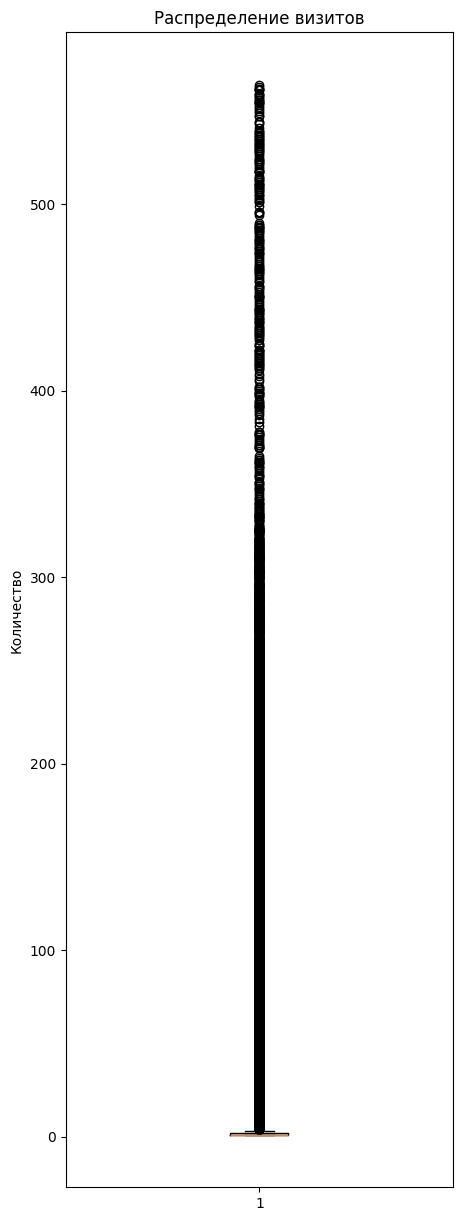

In [ ]:
plt.figure(figsize=(5, 15))
plt.boxplot(df.visit_number);
plt.title('Распределение визитов')
plt.ylabel('Количество');

Используем интерквартильный размах.

Посмотрим, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [ ]:
def quantiles(df):
    q25 = df.quantile(0.25)
    q75 = df.quantile(0.75) # квантиль
    iqr = q75 - q25 #размах
    quantil_column = (int(q25 - 1.5 * iqr), int(q75 + 1.5 * iqr))

    return quantil_column


quantil_visit = quantiles(df['visit_number'])
quantil_visit

(0, 3)

In [ ]:
# посмотрим количество выбросов с каждой стороны
is_outlier_right = sum(df.visit_number > quantil_visit[1])
is_outlier_left = sum(df.visit_number < quantil_visit[0])
print(is_outlier_left, is_outlier_right)

0 154129


заменим выбросы на = 4

In [26]:

df['visit_number'] = df['visit_number'].astype('int')
df['visit_number'] = np.where(df['visit_number'] > 3, 4, df['visit_number'])
df['visit_number'].value_counts()

visit_number
1    1333425
2     219641
4     154129
3      74779
Name: count, dtype: int64

Сохраним получившиеся данные для дальнейшей работы
А над данными в памяти произведем эксперимент

In [27]:
df.to_csv('data/df_clean.csv', index=False)


#### 10.
#### Преобразуем данные по типу '.astype('category').cat.codes', для и предварительно просмотра корреляции признаков к целевой переменной


In [28]:
# создаем временный датасет
# преобразуем данные
df_sur = df
for i in df_sur.columns:
    df_sur[i] = df_sur[i].astype('category').cat.codes
#print(df_sur.dtypes)
# выводим корреляцию
col_min_corr = []
for i in df_sur.columns:
    j = df_sur[i]
    corr = df_sur['event_value'].corr(j)
    if -0.001 < corr and corr < 0.001:
        col_min_corr.append(i)


    print('corr', i, round(df_sur['event_value'].corr(j), 6), 'to_event_value')

print('min_corr', col_min_corr)

corr session_id 0.000792 to_event_value
corr client_id 0.000439 to_event_value
corr visit_date -0.049805 to_event_value
corr visit_time -0.001273 to_event_value
corr visit_number 0.044406 to_event_value
corr utm_source 0.005975 to_event_value
corr utm_medium 0.027599 to_event_value
corr utm_campaign 0.003826 to_event_value
corr utm_adcontent -0.034338 to_event_value
corr device_category -0.011888 to_event_value
corr device_brand 0.004171 to_event_value
corr device_screen_resolution -0.009079 to_event_value
corr device_browser 0.001928 to_event_value
corr geo_country -0.001732 to_event_value
corr geo_city -0.001505 to_event_value
corr event_value 1.0 to_event_value
min_corr ['session_id', 'client_id']


In [ ]:
del df_sur
del df

## DATA VISUALIZATION

In [2]:
df = pd.read_csv('data/df_clean.csv')

In [4]:
df.dtypes

session_id                   object
client_id                   float64
visit_date                   object
visit_time                   object
visit_number                  int64
utm_source                   object
utm_medium                   object
utm_campaign                 object
utm_adcontent                object
device_category              object
device_brand                 object
device_screen_resolution     object
device_browser               object
geo_country                  object
geo_city                     object
event_value                   int64
dtype: object

In [3]:
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns
print(categorical)
numerical

Index(['session_id', 'visit_date', 'visit_time', 'utm_source', 'utm_medium',
       'utm_campaign', 'utm_adcontent', 'device_category', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country',
       'geo_city'],
      dtype='object')


Index(['client_id', 'visit_number', 'event_value'], dtype='object')

#### Просмотр зависимостей численных переменных

In [4]:
df[numerical].corr()

,client_id,visit_number,event_value
client_id,1.000000,0.000352,0.000439
visit_number,0.000352,1.000000,0.044406
event_value,0.000439,0.044406,1.000000


In [5]:
df[numerical].corr(method = 'spearman')

,client_id,visit_number,event_value
client_id,1.000000,0.000081,0.000439
visit_number,0.000081,1.000000,0.043379
event_value,0.000439,0.043379,1.000000


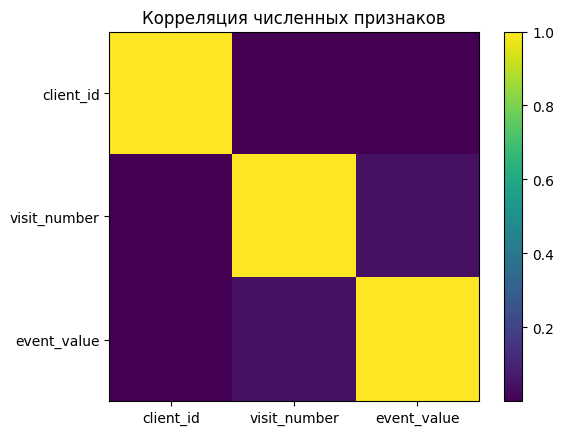

In [6]:
columns = df[numerical].corr().columns.tolist()
plt.imshow(df[numerical].corr())

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

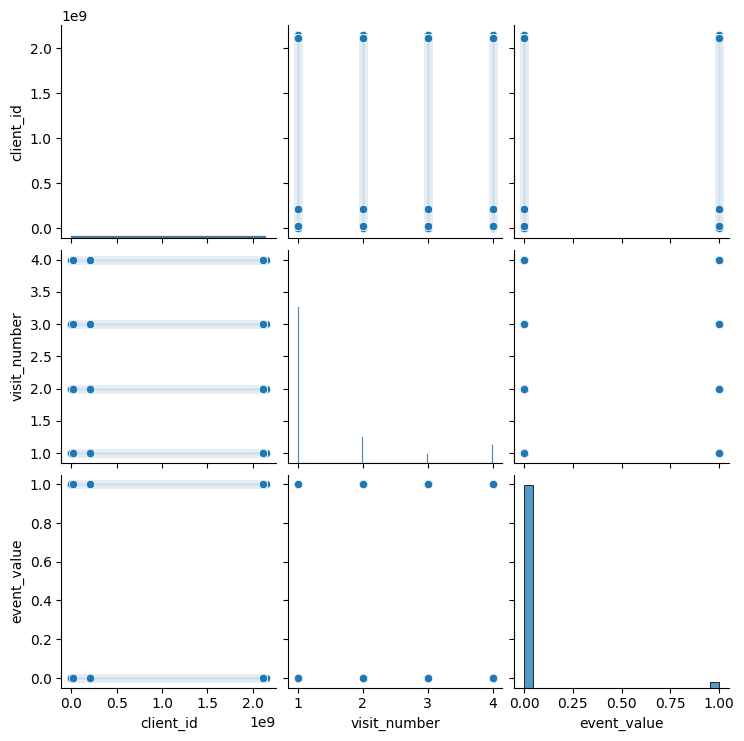

In [7]:
sns.pairplot(df[numerical])

<Axes: xlabel='visit_number', ylabel='count'>

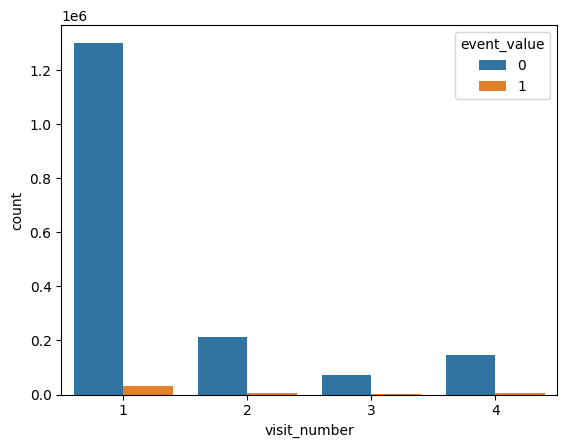

In [10]:
sns.countplot(x = 'visit_number', hue = 'event_value', data = df)

#### Просмотр влияния категориальных признаков на целевую переменную

In [8]:
categorical

Index(['session_id', 'visit_date', 'visit_time', 'utm_source', 'utm_medium',
       'utm_campaign', 'utm_adcontent', 'device_category', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country',
       'geo_city'],
      dtype='object')

<Axes: xlabel='utm_source', ylabel='count'>

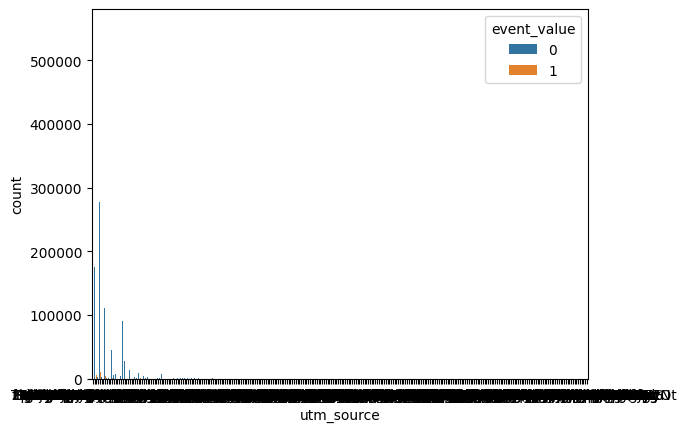

In [9]:
sns.countplot(x = 'utm_source', hue = 'event_value', data = df)

<Axes: xlabel='visit_date', ylabel='count'>

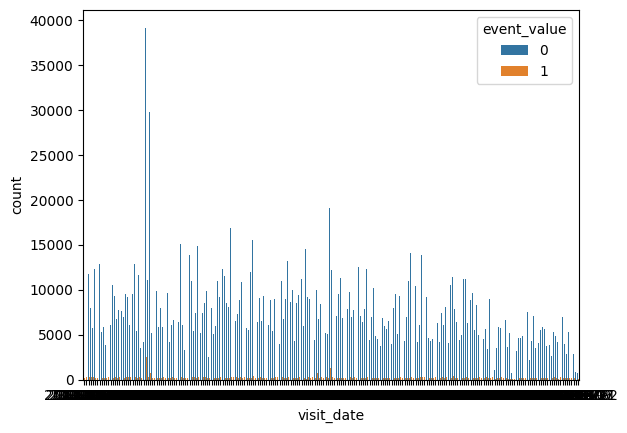

In [11]:
sns.countplot(x = 'visit_date', hue = 'event_value', data = df)

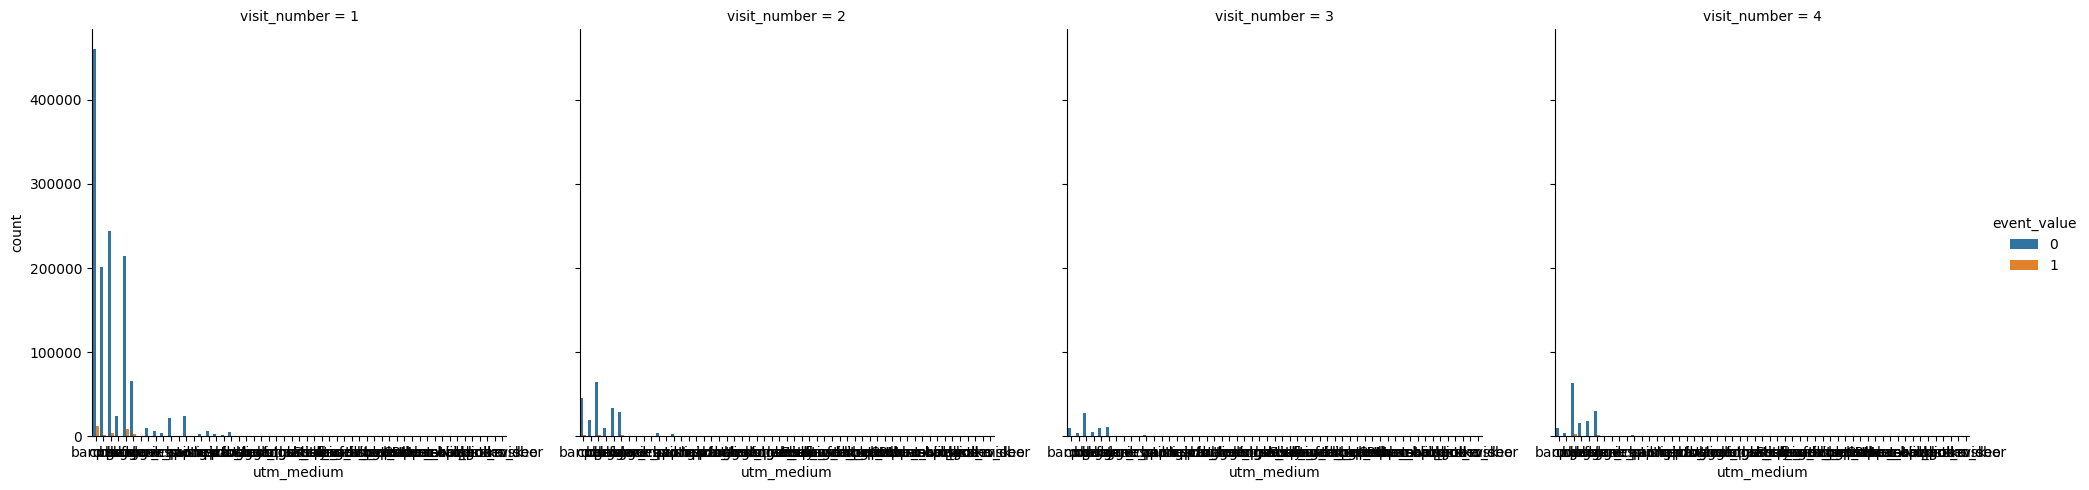

In [13]:
sns.catplot(x = 'utm_medium', hue = 'event_value', col = 'visit_number', kind = 'count', data = df)

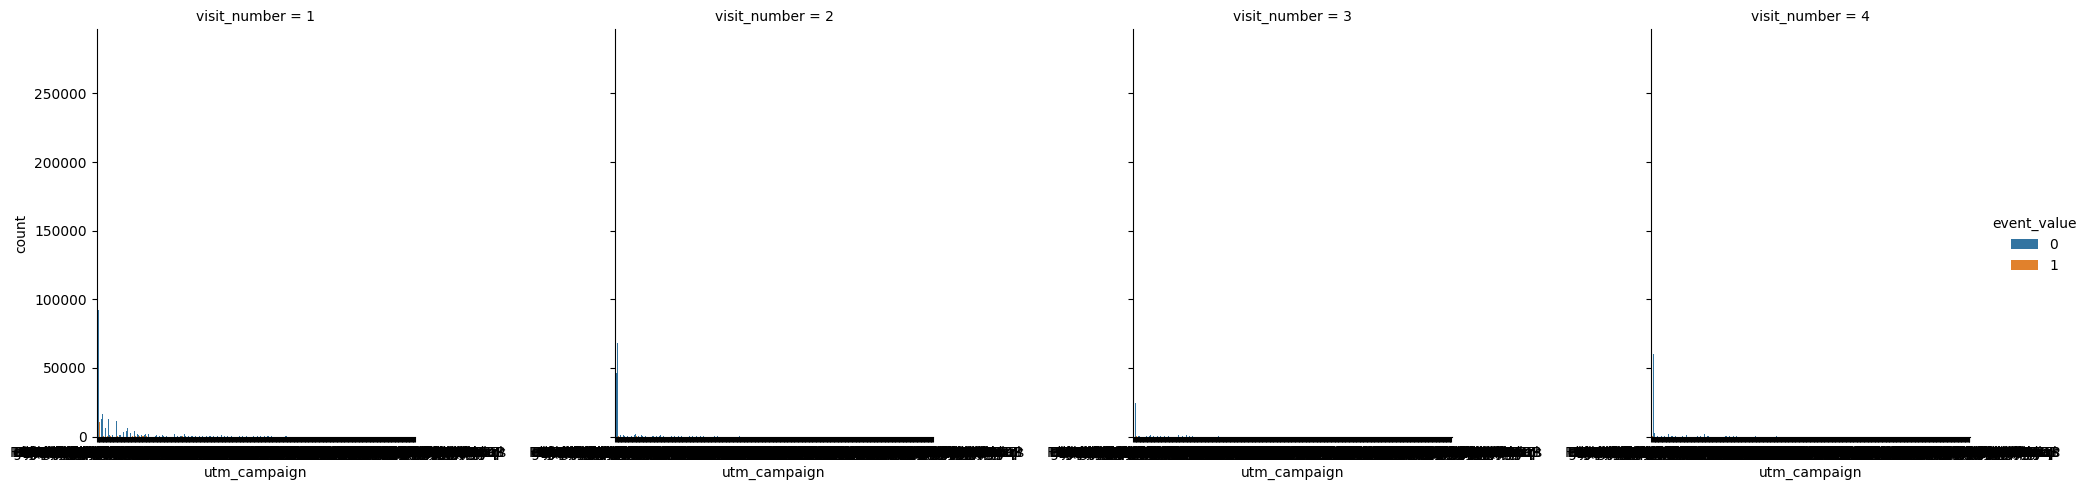

In [15]:
sns.catplot(x = 'utm_campaign', hue = 'event_value', col = 'visit_number', kind = 'count', data = df)

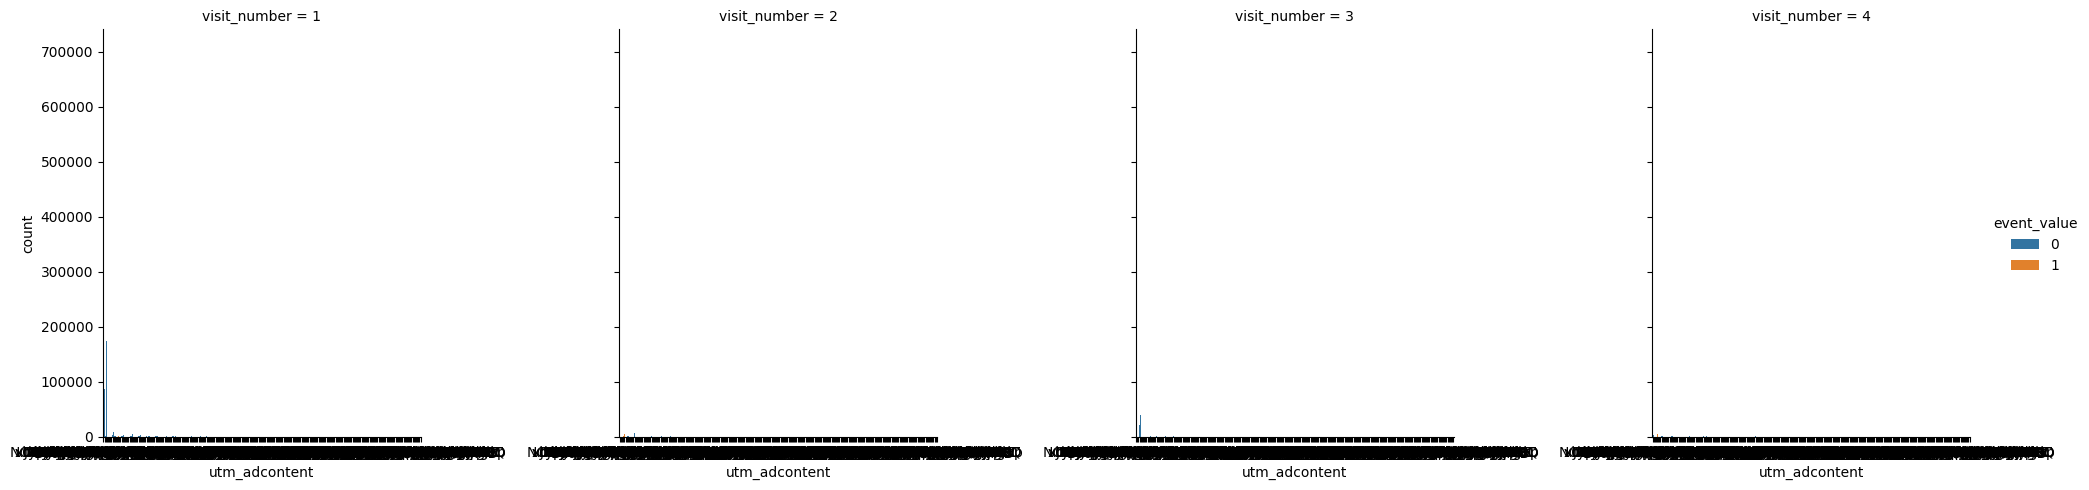

In [16]:
sns.catplot(x = 'utm_adcontent', hue = 'event_value', col = 'visit_number', kind = 'count', data = df)

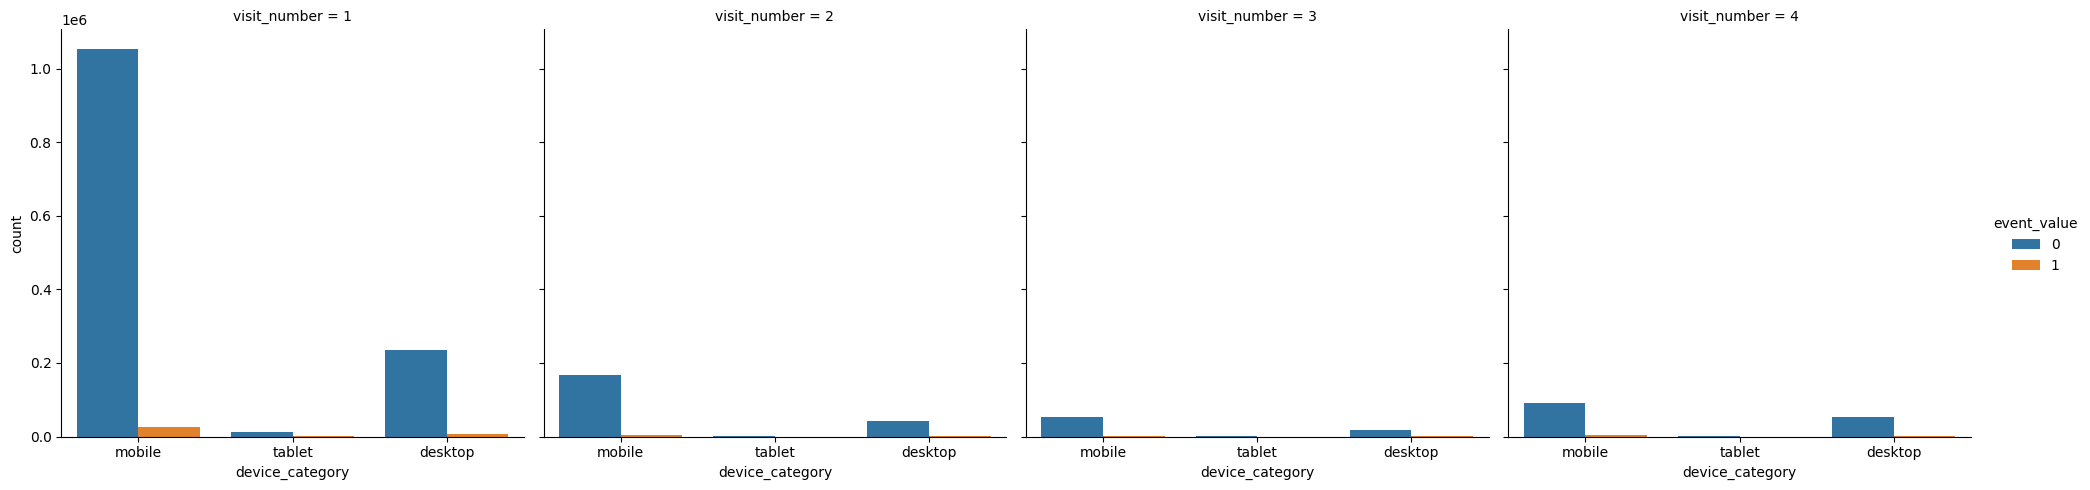

In [17]:
sns.catplot(x = 'device_category', hue = 'event_value', col = 'visit_number', kind = 'count', data = df)

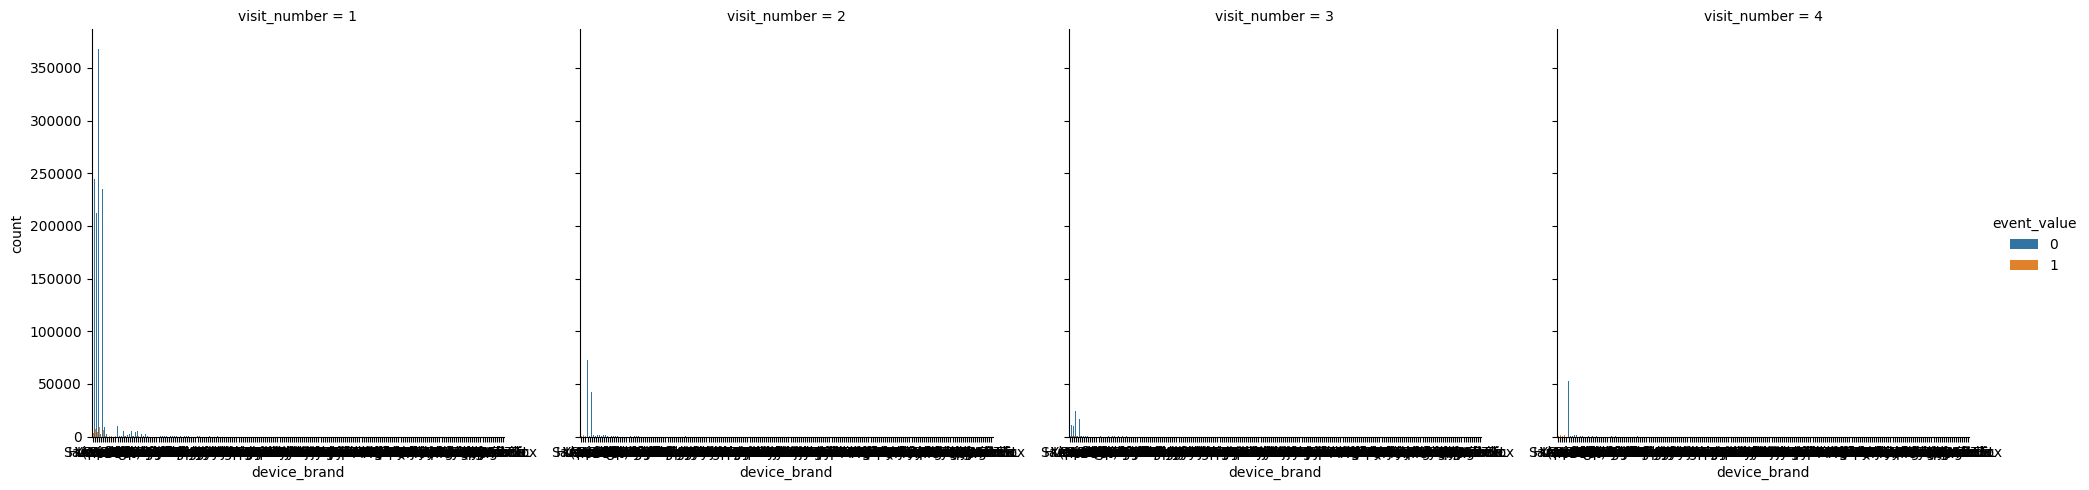

In [18]:
sns.catplot(x = 'device_brand', hue = 'event_value', col = 'visit_number', kind = 'count', data = df)

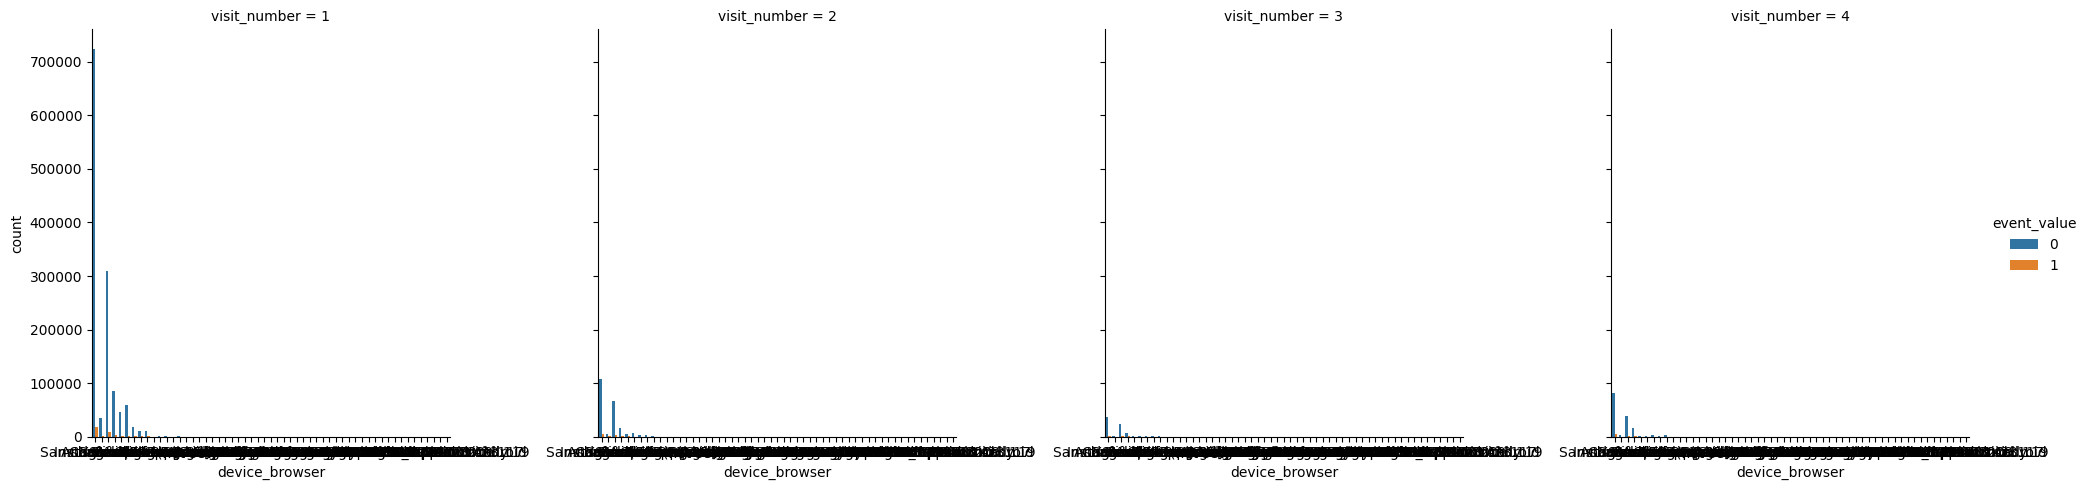

In [20]:
sns.catplot(x = 'device_browser', hue = 'event_value', col = 'visit_number', kind = 'count', data = df)

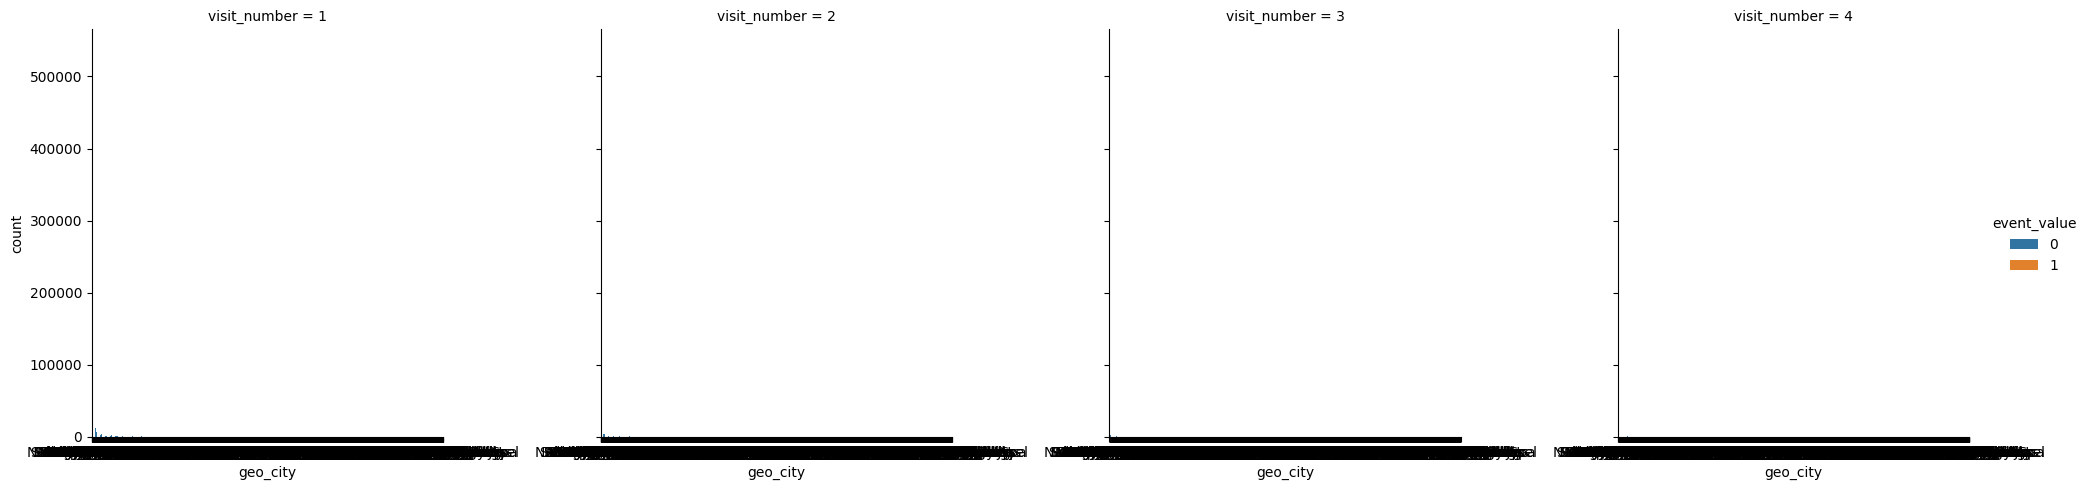

In [21]:
sns.catplot(x = 'geo_city', hue = 'event_value', col = 'visit_number', kind = 'count', data = df)

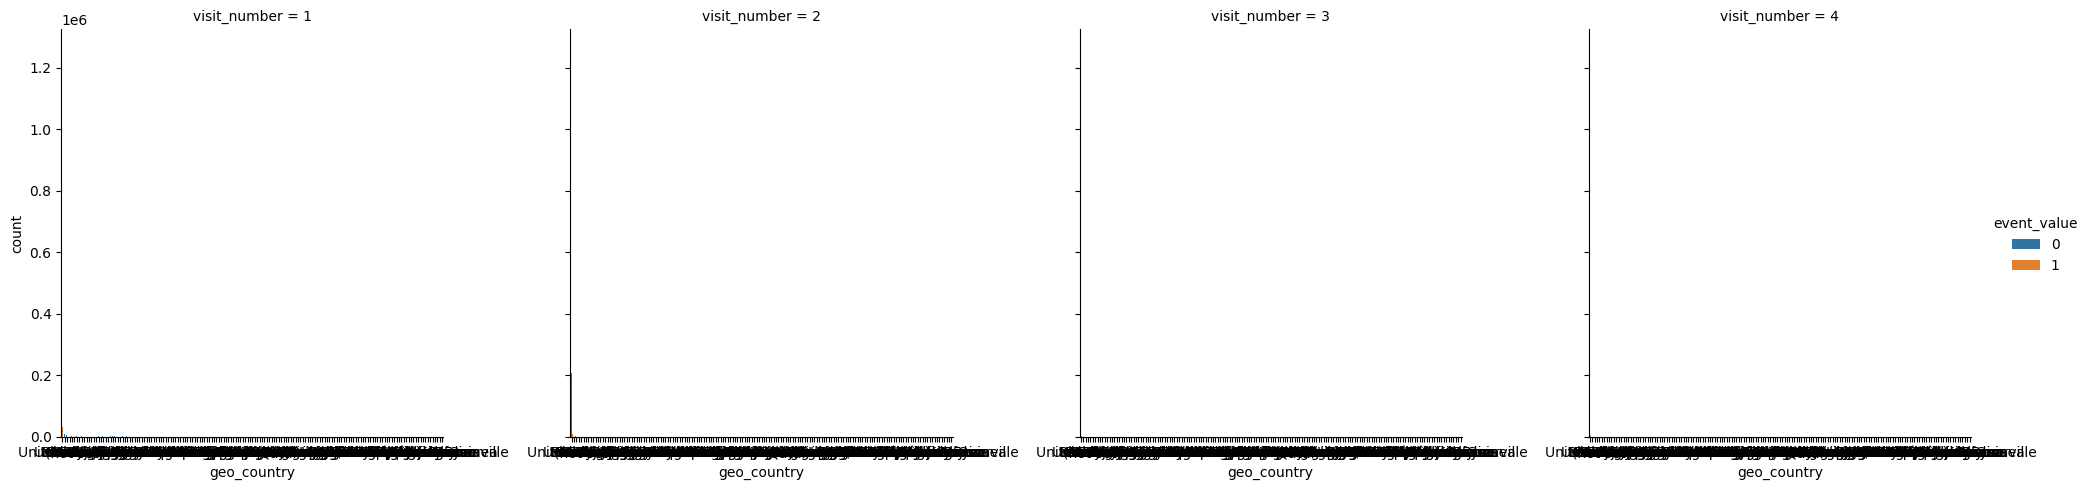

In [22]:
sns.catplot(x = 'geo_country', hue = 'event_value', col = 'visit_number', kind = 'count', data = df)

#### Таблицы сопряженности

In [4]:
df.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'device_category', 'device_brand', 'device_screen_resolution',
       'device_browser', 'geo_country', 'geo_city', 'event_value'],
      dtype='object')

               0      1
count                  
1333425  1301059  32366
219641    212031   7610
154129     71732   3047
74779     146838   7291


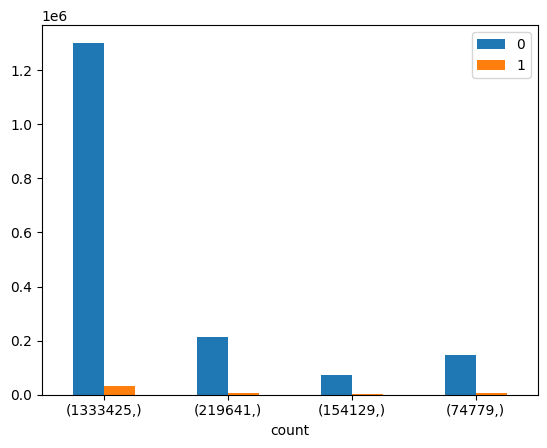

In [11]:
i = 'visit_number'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df.visit_number, columns = df.event_value)
 
# создадим названия категорий 
cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                        0   1
utm_source                   
AHgbtEjTEsiUMJouiDYS   14   0
ANoZJgYuPrWNkAAchryx   11   0
ArbfvYgWhqxkzywKqpQf   19   0
AuJjYKxJakEqFnCmyFtz    3   0
BAZCuyHZnaPrMGOMrcCQ    1   0
...                   ...  ..
zGUBrOvMRpLqBkJPUsYo    2   0
zPJpddwzkFqLMSYgtDqy    1   0
zhqxcsahQYAzJvRzebNp   28   1
zslzdtckVsyxcYqKBRRn    3   0
zwpKjjsMoRVCdipntaHt  392  11

[281 rows x 2 columns]


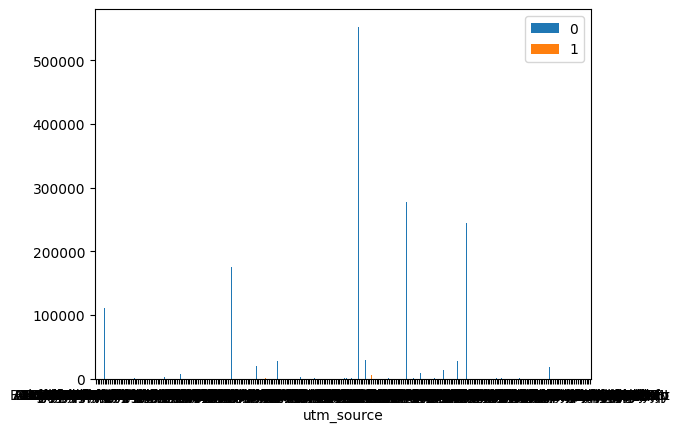

In [14]:
i = 'utm_source'
#index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                        0      1
utm_medium                      
CPM                    36      3
Sbol_catalog            1      0
app                  1211     11
article                15      0
banner             525182  15107
blabla             276890  10531
blogger_channel      7730    162
blogger_header        760      2
blogger_stories      4226     35
catalogue               4      0
cbaafe                 43      0
clicks                907     42
cpa                  3266    131
cpc                399205   9529
cpm                229751   2519
cpv                  7813    115
dom_click               1      1
email               28279    401
fb_smm                  8      1
google_cpc             15      0
info_text             335      2
landing               127     19
landing_interests       1      0
last                    1      0
link                   36     17
linktest                2      0
main_polka              3      0
medium                  8      1
nkp       

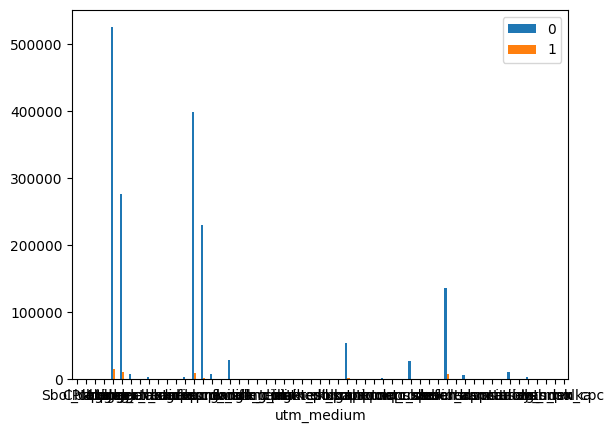

In [15]:
i = 'utm_medium'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                          0    1
utm_campaign                    
AdtHYglxfCpTpwZeTAuW      1    0
AqudXfUnmXWSDWVGYaXr   2271   10
BAZCuyHZnaPrMGOMrcCQ    466    1
BHcvLfOaCWvWTykYqHVe     30    0
BHqsCPwtnpaQSryaVXya     12    1
...                     ...  ...
zfwIehuEfWYdYrEZgRLo    767   17
zhmDvzviWNMgxXuZASKu      1    0
zmnpxOKDENholtspXiGy    709    2
zxoiLxhuSIFrCeTLQVWZ  12233  270
zzcBKEnbRkpqxqrfLtUQ     45    0

[407 rows x 2 columns]


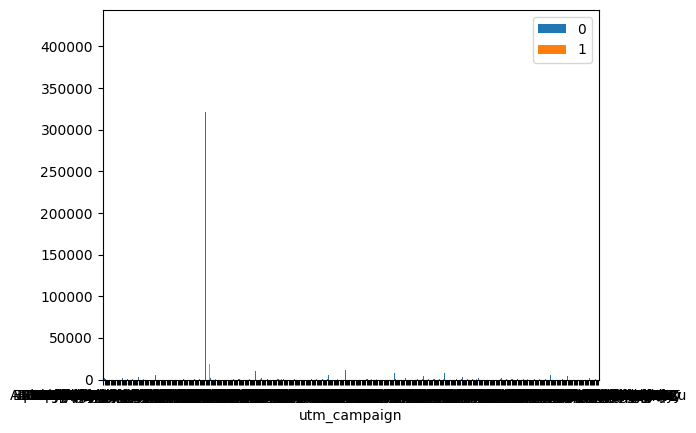

In [16]:
i = 'utm_campaign'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                         0   1
utm_adcontent                 
AByCsfZNGxnFrQkYzVAq    33   0
AIONnJpjXjEluFHEjOyg   575  20
AREbWGOhRGJXAffGqZTc    80   1
AbzcnvSMiZVQpjoceeKU   275   0
AdeErYgVTbRcAWtHrMHq  5534  60
...                    ...  ..
ywScCjfXuJyLkJMzfjEB    18   0
zEHnFIjqNyjvDvXKeMqx   247   3
zQEFTgQvqExfbldEpotc     1   0
zjrfBVIiQQBGguNcgGog     2   0
zpkCOCjptAAOxrlaKYsq    43   0

[281 rows x 2 columns]


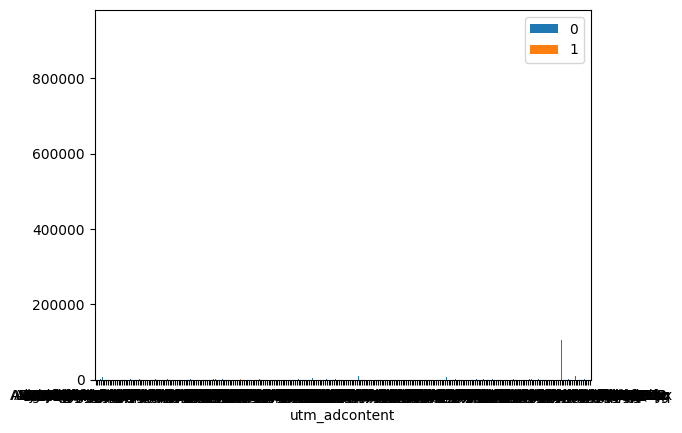

In [17]:
i = 'utm_adcontent'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                       0      1
device_category                
desktop           346580  11513
mobile           1368386  38379
tablet             16694    422


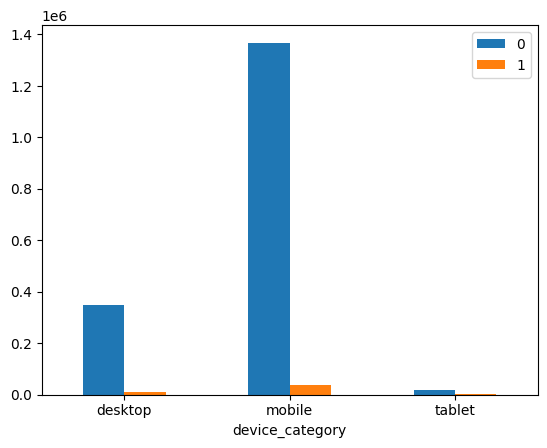

In [18]:
i = 'device_category'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                   0      1
device_brand               
(not set)      16391    454
A1                 5      0
AGM               46      2
AT&T               3      0
Acer              46      1
...              ...    ...
iNew              30      1
itel            1030     31
myPhone            1      0
other         346885  11518
teXet              1      0

[201 rows x 2 columns]


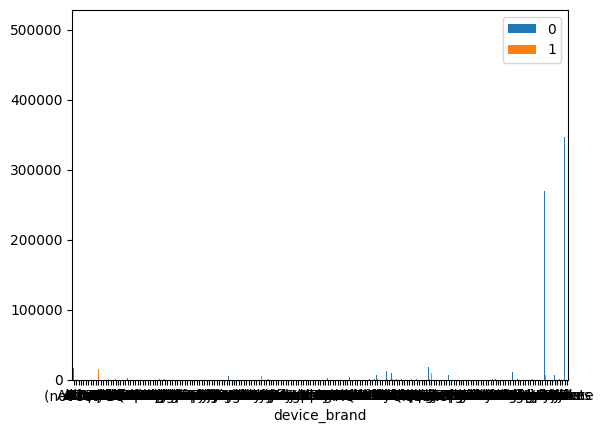

In [19]:
i = 'device_brand'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                                       0      1
device_browser                                 
(not set)                             11      0
Amazon Silk                            6      0
Android                               19      0
Android Browser                       47      0
Android Runtime                      241      0
Android Webview                    51919   1555
Chrome                            951217  27188
Coc Coc                                6      0
Edge                               15184    526
Firefox                            15731    578
Instagram 158.0.0.30.123 Android       3      0
Instagram 192.0.0.35.123 Android       3      0
Instagram 192.0.0.37.119               6      0
Instagram 194.0.0.36.172 Android      14      0
Instagram 199.0.0.27.120               2      0
Instagram 199.1.0.34.119 Android       2      0
Instagram 201.0.0.23.111               5      0
Instagram 202.0.0.23.119              17      0
Instagram 202.0.0.37.123 Android      12

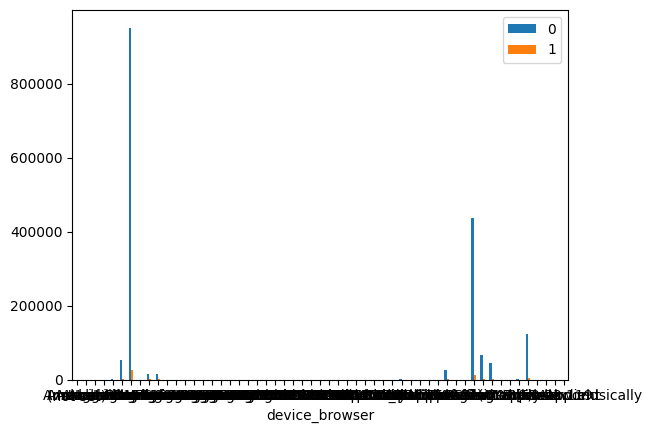

In [21]:
i = 'device_browser'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                    0   1
geo_country              
(not set)        1071  29
Afghanistan        31   2
Albania            30   4
Algeria            27   1
Andorra             8   0
...               ...  ..
Venezuela          21   0
Vietnam            60   1
Wallis & Futuna    22   0
Yemen               1   0
Zimbabwe            2   0

[159 rows x 2 columns]


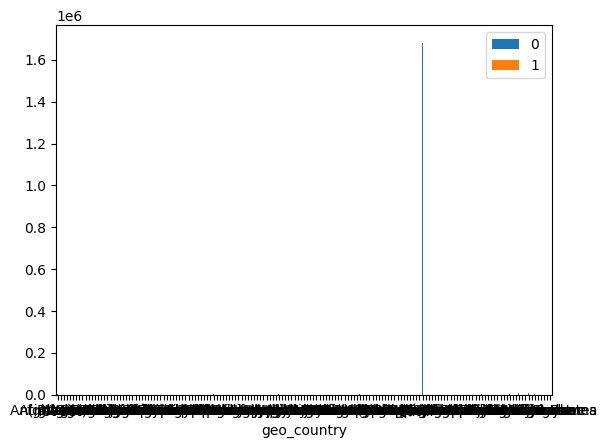

In [22]:
i = 'geo_country'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

                          0     1
geo_city                         
's-Hertogenbosch          2     0
(not set)             73273  1588
10th of Ramadan City     10     0
12214                     2     0
13403                    15     0
...                     ...   ...
Zwickau                   2     0
Zwolle                    3     0
Тарасовка                26     0
Тимофеевка               18     1
Хомутово                137     3

[2389 rows x 2 columns]


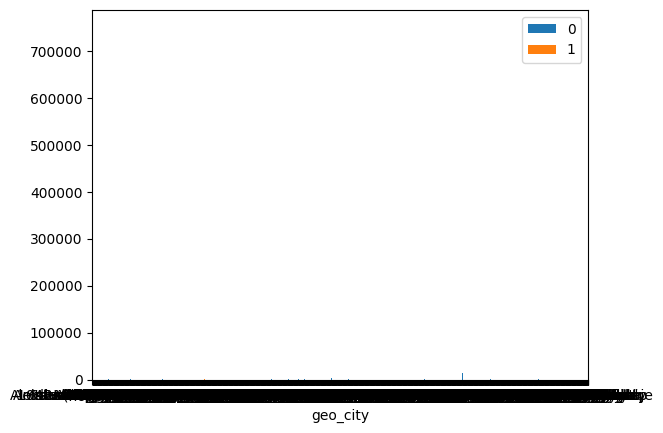

In [23]:
i = 'geo_city'
index_n = df[i].value_counts()
cross = pd.crosstab(index = df[i], columns = df.event_value)
 
# создадим названия категорий 
#cross.index = [index_n]
cross.columns = ['0', '1']
 
# выведем результат
print(cross)
cross.plot.bar(rot = 0);

#### Корреляция и общая картина по данным

In [ ]:
Преобразование данных, в отдельном датафрейме, для просмотра корреляций признаков к целевой переменной

In [5]:
df_sur = df
for i in df_sur.columns:
    df_sur[i] = df_sur[i].astype('category').cat.codes

In [6]:
df_corr = df_sur.corr()
df_corr

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
session_id,1.000000,0.772055,0.000157,0.001326,0.001822,-0.000817,-0.000230,0.004048,-0.000099,0.000754,-0.002039,0.000214,0.000087,0.000130,-0.001518,0.000792
client_id,0.772055,1.000000,0.000661,0.002020,0.000352,0.000133,-0.000417,0.003966,0.000478,0.001145,-0.000380,0.000186,-0.001678,-0.000742,-0.001061,0.000439
visit_date,0.000157,0.000661,1.000000,0.056113,-0.069014,-0.089374,-0.083445,0.092466,0.353986,0.119546,0.020976,0.056346,-0.100019,0.016191,0.033288,-0.049805
visit_time,0.001326,0.002020,0.056113,1.000000,0.023017,0.009950,0.016208,-0.005354,-0.004091,0.013889,-0.015635,0.007637,0.015049,0.000963,0.012965,-0.001273
visit_number,0.001822,0.000352,-0.069014,0.023017,1.000000,0.102256,0.222243,0.116454,0.010476,-0.114813,0.032665,-0.074071,0.028792,-0.007815,0.014601,0.044406
utm_source,-0.000817,0.000133,-0.089374,0.009950,0.102256,1.000000,0.016606,-0.081846,-0.292542,-0.041721,-0.080425,-0.030252,0.023968,-0.022891,0.012131,0.005975
utm_medium,-0.000230,-0.000417,-0.083445,0.016208,0.222243,0.016606,1.000000,0.065217,-0.094087,-0.218280,0.120214,-0.140986,0.019037,-0.011194,-0.005564,0.027599
utm_campaign,0.004048,0.003966,0.092466,-0.005354,0.116454,-0.081846,0.065217,1.000000,0.028192,0.019816,-0.067400,-0.004646,0.054360,-0.005054,0.011117,0.003826
utm_adcontent,-0.000099,0.000478,0.353986,-0.004091,0.010476,-0.292542,-0.094087,0.028192,1.000000,0.013521,0.061038,0.020263,-0.055768,0.018173,-0.003872,-0.034338
device_category,0.000754,0.001145,0.119546,0.013889,-0.114813,-0.041721,-0.218280,0.019816,0.013521,1.000000,-0.533541,0.657684,0.060177,0.020095,0.076433,-0.011888


In [10]:
col_min_corr = []
for i in df_sur.columns:
    j = df_sur[i]
    corr = df_sur['event_value'].corr(j)
    if -0.009 < corr and corr < 0.009:
        col_min_corr.append(i)


    print('corr', i, round(df_sur['event_value'].corr(j), 6), 'to_event_value')

print('min_corr', col_min_corr)

corr session_id 0.000792 to_event_value
corr client_id 0.000439 to_event_value


corr visit_date -0.049805 to_event_value
corr visit_time -0.001273 to_event_value
corr visit_number 0.044406 to_event_value
corr utm_source 0.005975 to_event_value
corr utm_medium 0.027599 to_event_value
corr utm_campaign 0.003826 to_event_value
corr utm_adcontent -0.034338 to_event_value
corr device_category -0.011888 to_event_value
corr device_brand 0.004171 to_event_value
corr device_screen_resolution -0.009079 to_event_value
corr device_browser 0.001928 to_event_value
corr geo_country -0.001732 to_event_value
corr geo_city -0.001505 to_event_value
corr event_value 1.0 to_event_value
min_corr ['session_id', 'client_id', 'visit_time', 'utm_source', 'utm_campaign', 'device_brand', 'device_browser', 'geo_country', 'geo_city']


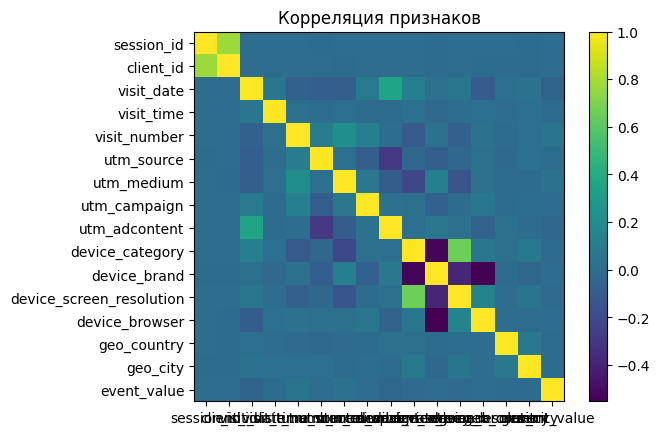

In [11]:
columns = df_sur.corr().columns.tolist()
plt.imshow(df_sur.corr())

plt.title("Корреляция признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

#### Удалим строки со странами кроме России и вновь посмотрим корреляции

In [12]:
df['geo_country'].value_counts()

geo_country
117    1730983
148       8653
151       8205
16        3491
50        2162
        ...   
109          1
98           1
114          1
157          1
30           1
Name: count, Length: 159, dtype: int64

In [14]:
russia_0 = df[df['geo_country']!=117]
russia_0


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
44,1680513,1296408,56,16944,0,149,4,99,45,1,10,3574,44,151,2033,0
210,1680672,1296520,7,34635,0,176,5,87,45,0,199,1181,6,148,1084,0
260,1680721,1296549,140,31035,0,176,5,87,45,1,10,1279,44,151,1690,0
295,1680753,129305,192,38016,1,176,5,87,45,1,191,2713,6,68,1124,0
302,1680760,1296572,84,59834,0,176,5,87,45,0,199,954,6,16,1315,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781795,1680296,1296268,195,31874,0,96,12,295,119,1,10,1279,45,151,647,0
1781820,1680321,1296285,192,6910,0,149,4,84,245,1,76,2027,6,138,1,0
1781821,1680322,1296285,220,2703,1,149,4,405,45,1,76,2027,6,150,1,0
1781822,1680323,1296285,220,2878,2,149,4,84,245,1,76,2027,6,150,1,0


In [15]:
df = df[df['geo_country']==117]
df.shape

(1730983, 16)

In [16]:
df_corr = df.corr()
df_corr

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
session_id,1.000000,0.771988,0.000281,0.001312,0.001824,-0.000802,0.000007,0.004339,-0.000305,0.001061,-0.002169,0.000387,-0.000217,NaN,-0.001227,0.000632
client_id,0.771988,1.000000,0.000560,0.002159,0.000372,0.000130,-0.000135,0.004058,0.000372,0.001437,-0.000505,0.000441,-0.001850,NaN,-0.000807,0.000274
visit_date,0.000281,0.000560,1.000000,0.056750,-0.069650,-0.086449,-0.082281,0.089329,0.354979,0.119433,0.022418,0.057167,-0.101538,NaN,0.033776,-0.049737
visit_time,0.001312,0.002159,0.056750,1.000000,0.023767,0.009609,0.015426,-0.005495,-0.003123,0.014046,-0.016136,0.007982,0.015679,NaN,0.013811,-0.001252
visit_number,0.001824,0.000372,-0.069650,0.023767,1.000000,0.101380,0.224637,0.118618,0.010236,-0.116829,0.032537,-0.077547,0.029917,NaN,0.012914,0.044327
utm_source,-0.000802,0.000130,-0.086449,0.009609,0.101380,1.000000,0.015094,-0.076754,-0.292245,-0.040474,-0.083236,-0.032507,0.025258,NaN,0.015417,0.005658
utm_medium,0.000007,-0.000135,-0.082281,0.015426,0.224637,0.015094,1.000000,0.065531,-0.093101,-0.222110,0.121445,-0.142838,0.020507,NaN,-0.004340,0.027801
utm_campaign,0.004339,0.004058,0.089329,-0.005495,0.118618,-0.076754,0.065531,1.000000,0.024224,0.019098,-0.068337,-0.004488,0.055233,NaN,0.012963,0.004747
utm_adcontent,-0.000305,0.000372,0.354979,-0.003123,0.010236,-0.292245,-0.093101,0.024224,1.000000,0.011308,0.062676,0.021118,-0.056212,NaN,-0.008152,-0.034546
device_category,0.001061,0.001437,0.119433,0.014046,-0.116829,-0.040474,-0.222110,0.019098,0.011308,1.000000,-0.530243,0.659197,0.055280,NaN,0.073683,-0.011799


In [17]:
df_sur = df 
col_min_corr = []
for i in df_sur.columns:
    j = df_sur[i]
    corr = df_sur['event_value'].corr(j)
    if -0.009 < corr and corr < 0.009:
        col_min_corr.append(i)


    print('corr', i, round(df_sur['event_value'].corr(j), 6), 'to_event_value')

print('min_corr', col_min_corr)

corr session_id 0.000632 to_event_value
corr client_id 0.000274 to_event_value
corr visit_date -0.049737 to_event_value
corr visit_time -0.001252 to_event_value
corr visit_number 0.044327 to_event_value
corr utm_source 0.005658 to_event_value
corr utm_medium 0.027801 to_event_value
corr utm_campaign 0.004747 to_event_value
corr utm_adcontent -0.034546 to_event_value
corr device_category -0.011799 to_event_value
corr device_brand 0.003815 to_event_value
corr device_screen_resolution -0.009886 to_event_value
corr device_browser 0.002002 to_event_value
corr geo_country nan to_event_value
corr geo_city -0.002607 to_event_value
corr event_value 1.0 to_event_value
min_corr ['session_id', 'client_id', 'visit_time', 'utm_source', 'utm_campaign', 'device_brand', 'device_browser', 'geo_city']


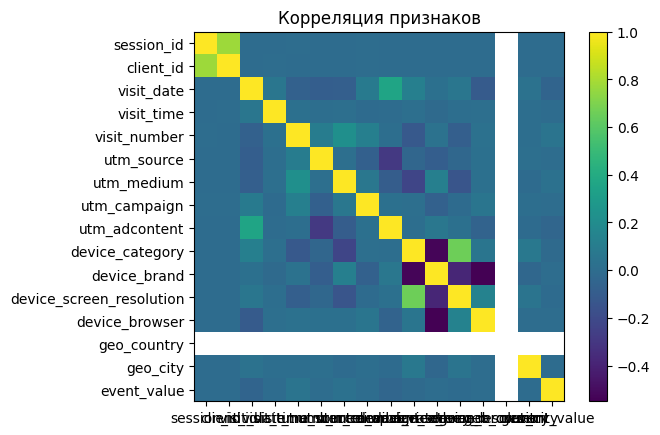

In [18]:
columns = df_sur.corr().columns.tolist()
plt.imshow(df_sur.corr())

plt.title("Корреляция признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

In [19]:
df_sur['event_value'].value_counts()

event_value
0    1681827
1      49156
Name: count, dtype: int64

In [20]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
0,1680469,1296381,188,51226,0,149,4,84,245,1,76,1967,6,117,2374,0
1,1680470,129282,178,28725,0,77,14,39,264,1,145,2521,46,117,1346,0
2,1680471,1296382,222,9527,0,149,4,84,245,1,76,1967,6,117,1047,0
3,1680472,1296383,9,16944,0,210,13,318,68,1,191,2650,6,117,1346,0
4,1680473,1296383,9,16944,1,210,13,318,207,1,191,2650,6,117,1346,0


In [ ]:
del df
del df_sur
del df_corr

## FEATURE ENGINEERING

#### Создание новых признаков, приведение типов

In [34]:
df = pd.read_csv('data/df_clean.csv')

In [35]:
print(df.shape)
df.head()

(1781974, 16)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0


#### 11.
#### Преобразование значений в категориальных переменных. Взяты первые 2-5 букв значения

In [36]:
df['w_source'] = df['utm_source'].str[0:5]
df.drop(['utm_source'], axis=1, inplace=True)
df['w_source'].nunique()

281

In [37]:
df['w_campaign'] = df['utm_campaign'].str[0:4]
df.drop(['utm_campaign'], axis=1, inplace=True)
df['w_campaign'].nunique()

407

In [38]:
df['w_adcontent'] = df['utm_adcontent'].str[0:3]
df.drop(['utm_adcontent'], axis=1, inplace=True)
df['w_adcontent'].nunique()

281

In [39]:
df['w_browser'] = df['device_browser'].str[0:3]
df.drop(['device_browser'], axis=1, inplace=True)
df['w_browser'].nunique()

29

Попробуем объеденить adconten и source посмотрим на количество уникальных значений

In [ ]:
df['adc_sourc'] = df['w_adcontent'] + ' ' + df['w_source']
df['adc_sourc'].nunique()

661

оставим как было

In [ ]:
df.drop(['adc_sourc'], axis=1, inplace=True)

#### Работа с датой и временем

#### 12.
#### соединим колонки date & time в колонку date_time и приведем к формату datetime

In [76]:

# соединим колонки date & time в колонку date_time и приведем к формату datetime
df['date_time'] = pd.to_datetime(df['visit_date'] + ' ' + df['visit_time'])
col_to_drop = ['visit_date', 'visit_time']  # сразу дропнем date & time
df = df.drop(col_to_drop, axis=1)
print('datetime', df.columns)

NameError: name 'df' is not defined

#### 13.
#### создадим новый признак - в который запишем: месяц, день недели и час

In [41]:
df['month_day_hour'] = df['date_time'].dt.month.astype(str) + '-' + df['date_time'].dt.dayofweek.astype(str) + '-' + df['date_time'].dt.hour.astype(str)
df.drop(['date_time'], axis=1, inplace=True)
df['month_day_hour'].nunique()

1344

#### 14.
#### Преобразуем значения screen в тип float

In [42]:
df['device_screen_resolution'] = df['device_screen_resolution'].apply(lambda x: float(x.split('x')[0]) * float(x.split('x')[1]))

In [43]:
# Преобразование колонок с типом данных object в тип данных categorical
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')
print(df.dtypes)  # Проверка результата

session_id                  category
client_id                    float64
visit_number                   int64
utm_medium                  category
device_category             category
device_brand                category
device_screen_resolution     float64
geo_country                 category
geo_city                    category
event_value                    int64
w_source                    category
w_campaign                  category
w_adcontent                 category
w_browser                   category
month_day_hour              category
dtype: object


In [ ]:
df.head()

,session_id,client_id,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,geo_country,geo_city,event_value,w_source,w_campaign,w_adcontent,w_browser,month_day_hour
0,9055434745589932991.1637753792.1637753792,2.108383e+09,1,banner,mobile,Huawei,259200.0,Russia,Zlatoust,0,ZpYIo,LEoP,vCI,Chr,11-2-14
1,905544597018549464.1636867290.1636867290,2.108385e+08,1,cpm,mobile,Samsung,328790.0,Russia,Moscow,0,MvfHs,FTjN,xho,Sam,11-6-8
2,9055446045651783499.1640648526.1640648526,2.108385e+09,1,banner,mobile,Huawei,259200.0,Russia,Krasnoyarsk,0,ZpYIo,LEoP,vCI,Chr,12-1-2
3,9055447046360770272.1622255328.1622255328,2.108386e+09,1,cpc,mobile,Xiaomi,308898.0,Russia,Moscow,0,kjsLg,both,NOB,Chr,5-5-5
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2,cpc,mobile,Xiaomi,308898.0,Russia,Moscow,0,kjsLg,both,pot,Chr,5-5-5


In [44]:
df['event_value'].value_counts()

event_value
0    1731660
1      50314
Name: count, dtype: int64

In [45]:
df.columns

Index(['session_id', 'client_id', 'visit_number', 'utm_medium',
       'device_category', 'device_brand', 'device_screen_resolution',
       'geo_country', 'geo_city', 'event_value', 'w_source', 'w_campaign',
       'w_adcontent', 'w_browser', 'month_day_hour'],
      dtype='object')

#### 15.
#### Поработаем с локацией, создадим новые фичи: latitude и longitude из признака geo_city

geolocator = Nominatim(user_agent="geo_locator")

def get_coordinates(city):
    location = geolocator.geocode(city)
    if location is not None:
        return location.latitude, location.longitude
    else:
        country = geolocator.geocode(city).raw['address']['country']
        center_location = geolocator.geocode(russia)
        return center_location.latitude, center_location.longitude

In [6]:
data = df

In [8]:
#from geopy.geocoders import Nominatim

def get_coordinates(city, country):
    df['geo_country'] = df['geo_country'].str.lower()
    df['geo_city'] = df['geo_city'].str.lower()
    geolocator = Nominatim(user_agent="geo_locator")
    location = geolocator.geocode(city + ", " + country)
    if location is not None:
        return location.latitude, location.longitude
    else:
        location = geolocator.geocode(country)
        return location.latitude, location.longitude


In [9]:
data["latitude"] = data.apply(lambda x: get_coordinates(x["geo_city"], x["geo_country"])[0], axis=1)
data["longitude"] = data.apply(lambda x: get_coordinates(x["geo_city"], x["geo_country"])[1], axis=1)


GeocoderServiceError: Non-successful status code 500

df['latitude'] = df['geo_city'].apply(lambda x: get_coordinates(x)[0])


df['longitude'] = df['geo_city'].apply(lambda x: get_coordinates(x)[1])

#### Откажемся от идеи с координатами, поскольку это сильно увеличит количество данных для обучения модели.

#### 16.
#### Для работы с локацией будем использовать численные значения. Создадим новый признак geo, в котором: 0 - Страны кроме России, 1 - Россия, 2 - Санкт-Петербург, 3 - Москва.

In [46]:
# узнаем тип данных
print(df['geo_country'].dtype)
# приведем данные к нижнему регистру
df['geo_country'] = df['geo_country'].str.lower()
df['geo_country'].value_counts()

category


geo_country
russia                 1730983
ukraine                   8653
united states             8205
belarus                   3491
germany                   2162
                        ...   
paraguay                     1
new caledonia                1
puerto rico                  1
yemen                        1
congo - brazzaville          1
Name: count, Length: 159, dtype: int64

In [47]:
# узнаем тип данных
print(df['geo_city'].dtype)
# приведем данные к нижнему регистру
df['geo_city'] = df['geo_city'].str.lower()
df['geo_city'].value_counts()

category


geo_city
moscow              774214
saint petersburg    285439
(not set)            74861
yekaterinburg        34438
krasnodar            31329
                     ...  
ascot                    1
barlinek                 1
griesheim                1
modena                   1
compiegne                1
Name: count, Length: 2389, dtype: int64

In [48]:
df['geo_city'].value_counts()

geo_city
moscow              774214
saint petersburg    285439
(not set)            74861
yekaterinburg        34438
krasnodar            31329
                     ...  
ascot                    1
barlinek                 1
griesheim                1
modena                   1
compiegne                1
Name: count, Length: 2389, dtype: int64

In [49]:
df['geo_city'] = df['geo_city'].apply(lambda x: 3 if x in ['moscow']  else 2 if x in ['saint petersburg'] else 1)

In [50]:
df['geo_city'].value_counts()

geo_city
3    774214
1    722321
2    285439
Name: count, dtype: int64

In [51]:
df['geo_country'] = df['geo_country'].apply(lambda x: 1 if x in ['russia']  else 0)

In [52]:
df['geo_country'].value_counts()

geo_country
1    1730983
0      50991
Name: count, dtype: int64

In [53]:
df['geo'] = df['geo_country'] * df['geo_city']

In [54]:
df['geo'].value_counts()

geo
3    774214
1    671330
2    285439
0     50991
Name: count, dtype: int64

In [55]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
missing_values

session_id                  0.0
client_id                   0.0
visit_number                0.0
utm_medium                  0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
geo_country                 0.0
geo_city                    0.0
event_value                 0.0
w_source                    0.0
w_campaign                  0.0
w_adcontent                 0.0
w_browser                   0.0
month_day_hour              0.0
geo                         0.0
dtype: float64

In [56]:
# удалим колонку страны
df.drop(['geo_country'], axis=1, inplace=True)
# удалим колонку города
df.drop(['geo_city'], axis=1, inplace=True)

#### 17. 
#### Создаим дополнительный признак utm_path из признаков: w_source, w_campaign, w_adcontent
#### посмотрим количество уникальных значений м позже посмотрим его корреляцию к целевой переменной

In [58]:
df['utm_path'] = df['w_source'].str.lower() + '_' + df['w_campaign'].str.lower() + '_' + df['w_adcontent'].str.lower()

In [59]:
df['utm_path'].value_counts()

utm_path
fdlla_ltuz_jnh    287421
zpyio_leop_vci    183041
zpyio_leop_jnh    146192
zpyio_gecb_jnh    136337
bhcvl_othe_oth    108905
                   ...  
jasom_jxhf_vcj         1
bbypq_urzc_oth         1
bellr_ltuz_jnh         1
yjich_ltuz_jnh         1
jasom_mtqu_ocp         1
Name: count, Length: 1447, dtype: int64

In [60]:
df['utm_path'].nunique()

1447

In [ ]:
#columns_to_drop = ['w_source', 'w_campaign', 'w_adcontent']
#df.drop(columns_to_drop, axis=1, inplace=True)

#### 18. 
#### Удаление колонок 'session_id', 'client_id' (возможно колоку 'session_id' оставим, посмотрим на поведение модели)

In [ ]:
#df.drop(['session_id', 'client_id'], axis=1, inplace=True)
df.shape

In [63]:
df.columns

Index(['visit_number', 'utm_medium', 'device_category', 'device_brand',
       'device_screen_resolution', 'event_value', 'w_source', 'w_campaign',
       'w_adcontent', 'w_browser', 'month_day_hour', 'geo', 'utm_path'],
      dtype='object')

#### 19. 
#### Создание дополнительного признака count для сохранения количества повторений данных при удалении дубликатов 

In [64]:

# добавление признака count
df['count_duplicates'] = df.groupby(df.columns.tolist()).cumcount() + 1 

In [65]:
# заполним пропуски==0
df['count_duplicates'].fillna(0, inplace=True)

In [ ]:
df.drop(['session_id', 'client_id'], axis=1, inplace=True)
df.shape

#### 20.
#### удаление дубликатов с сохранением количества повторений

In [66]:

df = df.drop_duplicates()

Проверим данные на пропуски

In [67]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
missing_values

visit_number                0.0
utm_medium                  0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
event_value                 0.0
w_source                    0.0
w_campaign                  0.0
w_adcontent                 0.0
w_browser                   0.0
month_day_hour              0.0
geo                         0.0
utm_path                    0.0
count_duplicates            0.0
dtype: float64

In [68]:
# проверим вхождения целевой переменной в выборку
df['event_value'].value_counts()


event_value
0    1731660
1      50314
Name: count, dtype: int64

In [69]:
df.head()

,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,event_value,w_source,w_campaign,w_adcontent,w_browser,month_day_hour,geo,utm_path,count_duplicates
0,1,banner,mobile,Huawei,259200.0,0,ZpYIo,LEoP,vCI,Chr,11-2-14,1,zpyio_leop_vci,1
1,1,cpm,mobile,Samsung,328790.0,0,MvfHs,FTjN,xho,Sam,11-6-8,3,mvfhs_ftjn_xho,1
2,1,banner,mobile,Huawei,259200.0,0,ZpYIo,LEoP,vCI,Chr,12-1-2,1,zpyio_leop_vci,1
3,1,cpc,mobile,Xiaomi,308898.0,0,kjsLg,othe,NOB,Chr,5-5-5,3,kjslg_othe_nob,1
4,2,cpc,mobile,Xiaomi,308898.0,0,kjsLg,othe,oth,Chr,5-5-5,3,kjslg_othe_oth,1


Сохраним получившиеся результаты

In [71]:
df.to_csv('data/df_to_ohe.csv', index=False)

Решить с: 

#columns_to_drop = ['w_source', 'w_campaign', 'w_adcontent']


#df.drop(columns_to_drop, axis=1, inplace=True)

Корреляция

#### 21. 
#### Преобразование данных, в отдельном датафрейме, для просмотра корреляций признаков к целевой переменной

In [72]:
df_sur = df
for i in df_sur.columns:
    df_sur[i] = df_sur[i].astype('category').cat.codes

#### 22. 
#### Просмотр корреляций и удаление слабокоррелируемых признаков. С корреляцией -0.01 - 0.01. 
От реализации ОТКАЗАЛСЯ

In [73]:
col_min_corr = []
for i in df_sur.columns:
    j = df_sur[i]
    corr = df_sur['event_value'].corr(j)
    if -0.001 < corr and corr < 0.001:
        col_min_corr.append(i)


    print('corr', i, round(df_sur['event_value'].corr(j), 6), 'to_event_value')

print('min_corr', col_min_corr)

corr visit_number 0.044406 to_event_value


corr utm_medium 0.027599 to_event_value
corr device_category -0.011888 to_event_value
corr device_brand 0.004171 to_event_value
corr device_screen_resolution 0.013314 to_event_value
corr event_value 1.0 to_event_value
corr w_source 0.005975 to_event_value
corr w_campaign 0.003826 to_event_value
corr w_adcontent -0.034338 to_event_value
corr w_browser 0.002565 to_event_value
corr month_day_hour 0.008775 to_event_value
corr geo 0.010118 to_event_value
corr utm_path -0.037188 to_event_value
corr count_duplicates -0.036074 to_event_value
min_corr []


In [75]:
del df
del df_sur

Признаки пока оставим будем пробовать их удалять в Pipeline

Исходя из значений корреляций признаков с признаком to_event_value, можно сделать следующие выводы:

    Признаки с наивысшей корреляцией (близкой к 1) - event_value и visit_number - являются важными для модели и должны быть сохранены.

    Признаки средней корреляции (от 0.01 до 0.05) - device_screen_resolution, utm_medium и device_category - могут быть полезными для модели и рекомендуется оставить их.

    Признаки с низкой корреляцией (менее 0.01) - utm_source, device_brand, device_browser, geo_country, geo_city и date_time - могут иметь меньшее влияние на целевую переменную и могут быть отброшены при обучении модели.

    Признак utm_campaign имеет отрицательную корреляцию с to_event_value, что может говорить о том, что он не имеет влияния на целевую переменную и может быть исключен из модели.

Таким образом, для обучения модели рекомендуется оставить признаки event_value, visit_number, device_screen_resolution и utm_medium, а отказаться от признаков utm_source, device_brand, device_browser, geo_country, geo_city, date_time и utm_campaign.

In [ ]:
#col_min_corr = ['utm_source', 'device_brand', 'device_browser', 'geo_country', 'geo_city', 'date_time', 'utm_campaign']

In [ ]:
#df_sur = df_sur.drop(col_min_corr, axis=1)
#print(df_sur.shape)
#df_sur.head()

(1171462, 12)


,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,event_value,w_source,w_campaign,w_adcontent,w_browser,month_day_hour,geo
0,0,4,1,76,460,0,149,84,245,3,222,1
1,0,14,1,145,1148,0,77,39,264,21,334,3
2,0,4,1,76,460,0,149,84,245,3,372,1
3,0,13,1,191,895,0,210,224,68,3,643,3
4,1,13,1,191,895,0,210,224,207,3,643,3


## 23. Черновики функций
## Дальнейшая работа над проектом производилась в PyCharm

In [ ]:
df_ohe.shape

columns_to_encode = df_ohe.select_dtypes(include=['category']).columns.drop('event_value')
columns_to_encode

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_ohe[columns_to_encode])

df_ohe.loc[:, encoder.get_feature_names_out()] = encoder.transform(df_ohe[columns_to_encode])
df_ohe.shape

#### Data Preparation, Data Cleaning, Feature Engineering.

#### ввиду большого объема данных и отсутствия технической возможности их обработки, дальнейшая работа произведена в PyCarm

Производим следующие действия:

удаление дубликатов

удаление колонок с пропусками в данных более 45%

удаление колонок где присутствует id

заполнение пропусков модой и медианой

значение (not_set) и (none) in utm_medium, решил изменить на other & blabla

создание колонки date_time и дроп visit_date & visit_time

приведение целевой переменной к категориальному типу

возникла идея screen перевести во float

преобразование колонок с типом данных object в тип данных categorical

изменение значений выбросов на граничные значения интерквантильного размаха

удаление признаков с низкой корреляцией

кодируем категориальные фичи с помощью OneHotEncoder

запишем датасет df_ohe для дальнейшей работы



In [127]:
df = pd.read_csv('data/df_train.csv')

In [76]:
df.shape

(1878339, 20)

In [77]:
df['event_value'].value_counts()

event_value
0    1827724
1      50615
Name: count, dtype: int64

In [49]:
df.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'event_value', 'count_duplicates'],
      dtype='object')

In [78]:
df['count_duplicates'].value_counts()

count_duplicates
0.0      1767856
1.0        14118
2.0         9157
3.0         7074
4.0         6156
          ...   
222.0          1
223.0          1
224.0          1
225.0          1
259.0          1
Name: count, Length: 260, dtype: int64

In [128]:
df['count_duplicates'].nunique()

260

In [129]:
def missing_out(df: pd.DataFrame) -> pd.DataFrame: # удалим колонки с пропусками в признаках более 45%
    missing_values = ((df.isna().sum() / len(df)) * 100)
    col_drop = missing_values[missing_values.values > 45].index.tolist()
    df = df.drop(col_drop, axis=1)
    print('missing_data', df.shape, missing_values)
    
    return df

In [130]:
df = missing_out(df)
df.shape

missing_data (1878339, 17) session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.004312
utm_medium                   0.000000
utm_campaign                10.774306
utm_adcontent               16.650030
utm_keyword                 56.161215
device_category              0.000000
device_os                   55.792059
device_brand                19.080847
device_model                94.049690
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event_value                  0.000000
count_duplicates             0.000000
dtype: float64


(1878339, 17)

In [82]:
def nan_out(df: pd.DataFrame) -> pd.DataFrame: # удаляем пропуски 
    # Сохраним в переменную categorical имена всех категориальных признаков нашего датасета
    categorical = df.select_dtypes(include=['object']).columns
    # Сохраним в переменную numerical имена всех числовых признаков нашего датасета
    numerical = df.select_dtypes(include=['int64', 'float64']).columns
    # В категориальных фичах заменяем пропуски значением 'other'
    for feat in categorical:
        df[feat].fillna('other', inplace=True)
    # В численных фичах заменяем пропуски медианой
    for feat in numerical:
        df[feat].fillna(df[feat].median(), inplace=True)
    print('NAN:', sum(df.isnull().sum()))  # Убедимся, что пропущенных значений больше нет
    return df

In [131]:
df = nan_out(df)
df.shape

NAN: 0


(1878339, 17)

In [84]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value,count_duplicates
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,0.0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0,0.0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0.0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0,0.0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0,0.0


In [85]:
def utm_medium(df: pd.DataFrame) -> pd.DataFrame: # По ходу просмотра мне не понравилось значение (not_set) и (none) in utm_medium, решил изменить на other & blabla
    df['utm_medium'] = df['utm_medium'].replace('(not set)', 'other')
    df['utm_medium'] = df['utm_medium'].replace('(none)', 'blabla')

    return df

In [132]:
df = utm_medium(df)
df.shape

(1878339, 17)

In [17]:
def visit_outliers(df: pd.DataFrame) -> pd.DataFrame:
    df['visit_number'] = df['visit_number'].astype('int')
    df['visit_number'] = np.where(df['visit_number'] > 3, 4, df['visit_number'])
    return df

In [133]:
df = visit_outliers(df)
df.shape

(1878339, 17)

In [88]:
df['visit_number'].value_counts()

visit_number
1    1413335
2     229615
4     158099
3      77290
Name: count, dtype: int64

In [20]:
def short_utm(df):
    df['w_source'] = df['utm_source'].str[0:5]
    df.drop(['utm_source'], axis=1, inplace=True)

    df['w_campaign'] = df['utm_campaign'].str[0:4]
    df.drop(['utm_campaign'], axis=1, inplace=True)

    df['w_adcontent'] = df['utm_adcontent'].str[0:3]
    df.drop(['utm_adcontent'], axis=1, inplace=True)

    df['w_browser'] = df['device_browser'].str[0:3]
    df.drop(['device_browser'], axis=1, inplace=True)

    return df
    

In [134]:
df = short_utm(df)
df.shape

(1878339, 17)

In [92]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,geo_country,geo_city,event_value,count_duplicates,w_source,w_campaign,w_adcontent,w_browser
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,banner,mobile,Huawei,360x720,Russia,Zlatoust,0,0.0,ZpYIo,LEoP,vCI,Chr
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,cpm,mobile,Samsung,385x854,Russia,Moscow,0,0.0,MvfHs,FTjN,xho,Sam
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,banner,mobile,Huawei,360x720,Russia,Krasnoyarsk,0,0.0,ZpYIo,LEoP,vCI,Chr
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,cpc,mobile,Xiaomi,393x786,Russia,Moscow,0,0.0,kjsLg,othe,NOB,Chr
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,cpc,mobile,Xiaomi,393x786,Russia,Moscow,0,0.0,kjsLg,othe,oth,Chr


In [93]:
def month_day_hour(df):
    df['date_time'] = pd.to_datetime(df['visit_date'] + ' ' + df['visit_time'])
    col_to_drop = ['visit_date', 'visit_time']  # сразу дропнем date & time
    df = df.drop(col_to_drop, axis=1)
    df['month_day_hour'] = df['date_time'].dt.month.astype(str) + '-' + df['date_time'].dt.dayofweek.astype(str) + '-' + df['date_time'].dt.hour.astype(str)
    df.drop(['date_time'], axis=1, inplace=True)

    return df
    
    

In [135]:
df = month_day_hour(df)
df.shape

(1878339, 16)

In [95]:
df['month_day_hour'].value_counts()

month_day_hour
12-1-14    11929
12-1-16     7007
12-4-22     6625
12-1-17     5440
12-1-15     5117
           ...  
5-4-3         44
5-4-2         41
5-3-4         36
5-3-3         36
5-4-4         31
Name: count, Length: 1344, dtype: int64

In [25]:
def screen_to_float(df: pd.DataFrame) -> pd.DataFrame:
    df['device_screen_resolution'] = df['device_screen_resolution'].apply(lambda x: float(x.split('x')[0]) * float(x.split('x')[1]))
    
    return df

In [136]:
df = screen_to_float(df)
df.shape

(1878339, 16)

In [97]:
def geo_to_int(df):
    df['geo_country'] = df['geo_country'].str.lower()
    df['geo_city'] = df['geo_city'].str.lower()
    
    df['geo_city'] = df['geo_city'].apply(lambda x: 3 if x in ['moscow']  else 2 if x in ['saint petersburg'] else 1)
    df['geo_country'] = df['geo_country'].apply(lambda x: 1 if x in ['russia']  else 0)
    df['geo'] = df['geo_country'] * df['geo_city']
    df.drop(['geo_country'], axis=1, inplace=True)
    df.drop(['geo_city'], axis=1, inplace=True)

    return df
    
    

In [137]:
df = geo_to_int(df)
df.shape

(1878339, 15)

In [138]:
df['geo'].value_counts()

geo
3    799727
1    729287
2    297330
0     51995
Name: count, dtype: int64

In [100]:
def utm_path(df):
    df['utm_path'] = df['w_source'].str.lower() + '_' + df['w_campaign'].str.lower() + '_' + df['w_adcontent'].str.lower()

    return df
    

In [139]:
df = utm_path(df)
df.shape

(1878339, 16)

In [ ]:
def drop_utm():
    df.drop(['w_source'], axis=1, inplace=True)
    df.drop(['w_campaign'], axis=1, inplace=True)
    df.drop(['w_adcontent'], axis=1, inplace=True)

    return df


In [141]:
def count_duplicates(df):
    print(df.shape)
    df.drop(['session_id', 'client_id'], axis=1, inplace=True)
    df['count_duplicates'] = df.groupby(df.columns.tolist()).cumcount() + 1 
    df['count_duplicates'].fillna(0, inplace=True)
    print(df.shape)

    return df
    
    

In [142]:
df = count_duplicates(df)
df.shape

(1878339, 16)


NameError: name 'pr' is not defined

In [143]:
df.shape

(1878339, 14)

In [107]:
df.columns

Index(['visit_number', 'utm_medium', 'device_category', 'device_brand',
       'device_screen_resolution', 'event_value', 'count_duplicates',
       'w_source', 'w_campaign', 'w_adcontent', 'w_browser', 'month_day_hour',
       'geo', 'utm_path'],
      dtype='object')

In [108]:
df.dtypes

visit_number                  int64
utm_medium                   object
device_category              object
device_brand                 object
device_screen_resolution    float64
event_value                   int64
count_duplicates              int64
w_source                     object
w_campaign                   object
w_adcontent                  object
w_browser                    object
month_day_hour               object
geo                           int64
utm_path                     object
dtype: object

In [42]:
df.head()

,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,event_value,w_source,w_campaign,w_adcontent,w_browser,month_day_hour,geo,utm_path,count_duplicates
0,1,banner,mobile,Huawei,259200.0,0,ZpYIo,LEoP,vCI,Chr,11-2-14,0,zpyio_leop_vci,1
1,1,cpm,mobile,Samsung,328790.0,0,MvfHs,FTjN,xho,Sam,11-6-8,0,mvfhs_ftjn_xho,1
2,1,banner,mobile,Huawei,259200.0,0,ZpYIo,LEoP,vCI,Chr,12-1-2,0,zpyio_leop_vci,1
3,1,cpc,mobile,Xiaomi,308898.0,0,kjsLg,othe,NOB,Chr,5-5-5,0,kjslg_othe_nob,1
4,2,cpc,mobile,Xiaomi,308898.0,0,kjsLg,othe,oth,Chr,5-5-5,0,kjslg_othe_oth,1


In [109]:
df['event_value'].value_counts()

event_value
0    1827724
1      50615
Name: count, dtype: int64

In [110]:
df['count_duplicates'].value_counts()

count_duplicates
1      1171462
2       220050
3       104001
4        64598
5        45403
        ...   
409          1
408          1
407          1
406          1
625          1
Name: count, Length: 625, dtype: int64

In [111]:
df_ohe = pd.read_csv('data/df_to_ohe.csv')

In [112]:
df_ohe.shape

(1781974, 14)

In [113]:
df.shape

(1878339, 14)

In [114]:
df_ohe.head()

,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,event_value,w_source,w_campaign,w_adcontent,w_browser,month_day_hour,geo,utm_path,count_duplicates
0,1,banner,mobile,Huawei,259200.0,0,ZpYIo,LEoP,vCI,Chr,11-2-14,1,zpyio_leop_vci,1
1,1,cpm,mobile,Samsung,328790.0,0,MvfHs,FTjN,xho,Sam,11-6-8,3,mvfhs_ftjn_xho,1
2,1,banner,mobile,Huawei,259200.0,0,ZpYIo,LEoP,vCI,Chr,12-1-2,1,zpyio_leop_vci,1
3,1,cpc,mobile,Xiaomi,308898.0,0,kjsLg,othe,NOB,Chr,5-5-5,3,kjslg_othe_nob,1
4,2,cpc,mobile,Xiaomi,308898.0,0,kjsLg,othe,oth,Chr,5-5-5,3,kjslg_othe_oth,1


In [115]:
df.head()

,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,event_value,count_duplicates,w_source,w_campaign,w_adcontent,w_browser,month_day_hour,geo,utm_path
0,1,banner,mobile,Huawei,259200.0,0,1,ZpYIo,LEoP,vCI,Chr,11-2-14,1,zpyio_leop_vci
1,1,cpm,mobile,Samsung,328790.0,0,1,MvfHs,FTjN,xho,Sam,11-6-8,3,mvfhs_ftjn_xho
2,1,banner,mobile,Huawei,259200.0,0,1,ZpYIo,LEoP,vCI,Chr,12-1-2,1,zpyio_leop_vci
3,1,cpc,mobile,Xiaomi,308898.0,0,1,kjsLg,othe,NOB,Chr,5-5-5,3,kjslg_othe_nob
4,2,cpc,mobile,Xiaomi,308898.0,0,1,kjsLg,othe,oth,Chr,5-5-5,3,kjslg_othe_oth


In [116]:
for col in df.columns:
    if df[col].equals(df_ohe[col]):
        print(f"Значения в столбце {col} идентичны")
    else:
        print(f"Значения в столбце {col} различаются")

Значения в столбце visit_number различаются
Значения в столбце utm_medium различаются
Значения в столбце device_category различаются
Значения в столбце device_brand различаются
Значения в столбце device_screen_resolution различаются
Значения в столбце event_value различаются
Значения в столбце count_duplicates различаются
Значения в столбце w_source различаются
Значения в столбце w_campaign различаются
Значения в столбце w_adcontent различаются
Значения в столбце w_browser различаются
Значения в столбце month_day_hour различаются
Значения в столбце geo различаются
Значения в столбце utm_path различаются


In [123]:
for i in df.columns:
    print(i, df[i].nunique()) #, df[i].value_counts())
    print(i, df_ohe[i].nunique()) #, df_ohe[i].value_counts())

visit_number 4
visit_number 4


utm_medium 55
utm_medium 55
device_category 3
device_category 3
device_brand 201
device_brand 201
device_screen_resolution 4506
device_screen_resolution 4506
event_value 2
event_value 2
count_duplicates 625
count_duplicates 625
w_source 281
w_source 281
w_campaign 407
w_campaign 407
w_adcontent 281
w_adcontent 281
w_browser 29
w_browser 29
month_day_hour 1344
month_day_hour 1344
geo 4
geo 4
utm_path 1447
utm_path 1447


In [124]:
for i in df.columns:
    print(df[i].nunique())

4
55
3
201
4506
2
625
281
407
281
29
1344
4
1447


for col in df.columns:
    if df[col].equals(df_ohe[col]):
        print(f"Значения в столбце {col} идентичны")
    else:
        print(f"Значения в столбце {col} различаются")

In [ ]:
df_merged = pd.read_csv('data/df_merged.csv')
print('merged', df_merged.shape)
df_merged.drop_duplicates(inplace=True) # Удалим дубликаты

df_to_prepare = df_merged
print('duplicates', df_to_prepare.shape)
del df_merged # удалим из памяти

# удалим колонки с пропусками в признаках более 45%
missing_values = ((df_to_prepare.isna().sum() / len(df_to_prepare)) * 100)
col_drop = missing_values[missing_values.values > 45].index.tolist()
df_to_prepare = df_to_prepare.drop(col_drop, axis=1)
print('missing_data', df_to_prepare.shape)

# удалим колонки в которых присутствует id
col_id=df_to_prepare.filter(like='id').columns
df_to_prepare = df_to_prepare.drop(col_id, axis=True)
#df_to_prepare.drop(columns=df_to_prepare.filter(like='id').columns, inplace=True) # можно было так
print('without_id', df_to_prepare.shape)

df_cleaning = df_to_prepare # освободим память
del df_to_prepare

# Сохраним в переменную numerical имена всех числовых признаков нашего датасета
numerical = df_cleaning.select_dtypes(include=['int64', 'float64']).columns

# Сохраним в переменную categorical имена всех категориальных признаков нашего датасета
categorical = df_cleaning.select_dtypes(include=['object']).columns

# В категориальных фичах заменяем пропуски модой
for feat in categorical:
    df_cleaning[feat].fillna(df_cleaning[feat].mode()[0], inplace=True)

# В численных фичах заменяем пропуски медианой
for feat in numerical:
    df_cleaning[feat].fillna(df_cleaning[feat].median(), inplace=True)

print('NAN:',sum(df_cleaning.isnull().sum())) # Убедимся, что пропущенных значений больше нет

# По ходу просмотра мне не понравилось значение (not_set) и (none) in utm_medium, решил изменить на other & blabla
df_cleaning['utm_medium'] = df_cleaning['utm_medium'].replace('(not set)', 'other')
df_cleaning['utm_medium'] = df_cleaning['utm_medium'].replace('(none)', 'blabla')

df_feature = df_cleaning # перейдем на новый датасет
del df_cleaning # освободим память


# соединим колонки date & time в колонку date_time и приведем к формату datetime
df_feature['date_time'] = pd.to_datetime(df_feature['visit_date'] + ' ' + df_feature['visit_time'])
col_to_drop = ['visit_date', 'visit_time'] # сразу дропнем date & time
df_feature = df_feature.drop(col_to_drop, axis=1)
print('datetime', df_feature.shape)

# приведем целевую переменную к категориальному типу
df_feature['event_value'] = df_feature['event_value'].astype('category')

# возникла идея screen перевести во float
df_feature['device_screen_resolution'] = df_feature['device_screen_resolution'].apply(lambda x: float(x.split('x')[0]) * float(x.split('x')[1]))

# Преобразование колонок с типом данных object в тип данных categorical
object_columns = df_feature.select_dtypes(include=['object']).columns
df_feature[object_columns] = df_feature[object_columns].astype('category')
print(df_feature.dtypes) # Проверка результата



# Поработаем с выбросами
numerical_columns = df_feature.select_dtypes(include=['int', 'float']).columns


def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df


for col in numerical_columns:
    df_feature = remove_outliers(df_feature, col)

# Перейдем на следующий df
df_ohe = df_feature
del df_feature

print('ohe_start', df_ohe.shape, df_ohe.dtypes)


col_min_corr = ['utm_source', 'device_brand', 'device_browser', 'geo_country', 'geo_city', 'date_time', 'utm_campaign']
# дропнем колонки с минимальной корреляцией
df_ohe = df_ohe.drop(col_min_corr, axis=1)
print('good_corr', df_ohe.shape, df_ohe.columns)
print(df_ohe.dtypes)


# OneHotEncoder кодируем категориальные переменные
columns_to_encode = df_ohe.select_dtypes(include=['category']).columns.drop('event_value')
columns_to_encode

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(df_ohe[columns_to_encode])

df_ohe.loc[:, encoder.get_feature_names_out()] = encoder.transform(df_ohe[columns_to_encode])
df_ohe.to_csv('data/df_ohe.csv', index=False)
print(df_ohe.shape)

merged (15685219, 19)
duplicates (1781974, 19)
missing_data (1781974, 16)
without_id (1781974, 14)
NAN: 0
datetime (1781974, 13)
visit_number                         int64
utm_source                        category
utm_medium                        category
utm_campaign                      category
utm_adcontent                     category
device_category                   category
device_brand                      category
device_screen_resolution           float64
device_browser                    category
geo_country                       category
geo_city                          category
event_value                       category
date_time                   datetime64[ns]
dtype: object
ohe_start (1781974, 13) visit_number                       float64
utm_source                        category
utm_medium                        category
utm_campaign                      category
utm_adcontent                     category
device_category                   category
device_brand    

#### OneHotEncoder

Сохраним в переменную categorical имена всех категориальных признаков нашего датасета

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Skillbox/sber_auto/jupyter/data/df_clean2004.csv')
df.head()

,visit_number,utm_medium,device_category,device_brand,device_screen_resolution,event_value,w_source,w_campaign,w_adcontent,w_browser,month_day_hour,geo
0,1,banner,mobile,Huawei,259200.0,0,ZpYIo,LEoP,vCI,Chr,11-2-14,1
1,1,cpm,mobile,Samsung,328790.0,0,MvfHs,FTjN,xho,Sam,11-6-8,3
2,1,banner,mobile,Huawei,259200.0,0,ZpYIo,LEoP,vCI,Chr,12-1-2,1
3,1,cpc,mobile,Xiaomi,308898.0,0,kjsLg,both,NOB,Chr,5-5-5,3
4,2,cpc,mobile,Xiaomi,308898.0,0,kjsLg,both,pot,Chr,5-5-5,3


In [ ]:
data_categorical = df.select_dtypes(include=['object', 'category'])
data_categorical

,utm_medium,device_category,device_brand,w_source,w_campaign,w_adcontent,w_browser,month_day_hour
0,banner,mobile,Huawei,ZpYIo,LEoP,vCI,Chr,11-2-14
1,cpm,mobile,Samsung,MvfHs,FTjN,xho,Sam,11-6-8
2,banner,mobile,Huawei,ZpYIo,LEoP,vCI,Chr,12-1-2
3,cpc,mobile,Xiaomi,kjsLg,both,NOB,Chr,5-5-5
4,cpc,mobile,Xiaomi,kjsLg,both,pot,Chr,5-5-5
...,...,...,...,...,...,...,...,...
1171457,blabla,desktop,other,fDLlA,LTuZ,JNH,Chr,9-5-17
1171458,cpc,mobile,Apple,kjsLg,RoDi,pot,Saf,11-2-7
1171459,referral,mobile,Samsung,bByPQ,LTuZ,JNH,And,8-2-20
1171460,referral,mobile,Samsung,bByPQ,LTuZ,JNH,And,8-2-20


In [ ]:
data_categorical.columns

Index(['utm_medium', 'device_category', 'device_brand', 'w_source',
       'w_campaign', 'w_adcontent', 'w_browser', 'month_day_hour'],
      dtype='object')

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe.fit(data_categorical)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_data = ohe.fit_transform(data_categorical)
ohe_data

<1171462x2601 sparse matrix of type '<class 'numpy.float64'>'
	with 9371696 stored elements in Compressed Sparse Row format>

In [ ]:
new_col = ohe.get_feature_names_out()

In [ ]:
data = pd.DataFrame(ohe_data.toarray(), columns=new_col)

In [ ]:
ohe_data.shape

(1171462, 2601)

In [ ]:
len(new_col)

2601

In [ ]:
df.shape

(1171462, 12)

#### MODELING

#### попробуем для начала LogisticRegression, RandomForestClassifier, SVC

In [ ]:
df['event_value'] = df['event_value'].astype('category')

X = df.drop('event_value', axis=1)
y = df['event_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
clft = RandomForestClassifier(random_state=42)
clft.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

predicted_train = clft.predict(x_train)
predicted_test = clft.predict(x_test)

In [ ]:
confusion_matrix(y_test, predicted_test)

array([[325573,  11537],
       [ 14226,    103]])

In [ ]:
# Вычисление roc_auc
roc_auc = roc_auc_score(y_test, predicted_test)

print("ROC AUC score:", roc_auc)

ROC AUC score: 0.486482484561648
